# Proyecto final: Predicción de las calorías quemadas de un miembro de gimnasio utilizando sus características demográficas y cardiovasculares.

## Aprendices: Jason Stephen Wills Vargas- Solenis Alguero Ruiz

## Ficha 3141547

## Programa: Procesamiento de datos para modelos de inteligencia artificial.

## 1. Prerrequisitos (Librerías y archivos a utilizar)
### 1.1 Librerías a importar

In [1]:
import pandas as pd # Librería para análisis de datos manipulación y limpieza de datos (Generar dataframes y procesos de estadística)
import numpy as np # Librería utilizada para manejo de vectores, arreglos o matrices (Incluye procesos estadisticos)
import matplotlib.pyplot as plt # Librería para generar gráficas en el lenguaje de programación Python
import seaborn as sns # Librería para generar gráficas con mayor detalle y atractivas para el usuario

#---------------LIBRERÍAS PARA GENERAR MODELOS DE MACHINE LEARNING (Aprendizaje de máquina) -----------------------------------
# Modulo que permite generar modelos de regresión lineal
from sklearn.linear_model import LinearRegression
# Modulo utilizado para generar modelos de árboles de decisión con DecisionTreeRegressor
# y plot tree para visualizar el procedimiento de los árboles de decision
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Modulo de ensamble para generar modelos de bosques aleatorios regresivos (RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor
# Modulo de red neuronal para generar modelos de perceptron multicapa regresivo (MLPRegressor)
from sklearn.neural_network import MLPRegressor
# Modulo encargado de generar los conjuntos de entrenamiento y prueba para el modelo (train_test_split)
from sklearn.model_selection import train_test_split
# Modulo para producir las metricas de los modelos seleccionados (a utilizar: MSA, MSE, RWSE, MAPE y R2)
import sklearn.metrics as metrics_regressor

# Modulo de pipeline que maneja el tratamiento de preprocesamiento para el modelo seleccionado (Escalamientos, modelos, etc)
from sklearn.pipeline import Pipeline

# Modulo de preprocesamiento para la categorización (OrdinalEncoder) y escalamiento u normalización (StandardScaler, RobustScaler)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
# Modulo de selección de modelo para obtener, por medio de busqueda aleatoria ("RandomizedSearchCV") los mejores parametros para cada modelo
from sklearn.model_selection import RandomizedSearchCV

# Generar distribuciones normales uniformes para tratamiento de hyperparametros
from scipy.stats import uniform

# Modulo de python para serializar el modelo entrenado seleccionado para despliegue
import joblib

# Libreria para eliminar las advertencias dadas por el interprete d python
import warnings
warnings.filterwarnings("ignore")


### 1.2 Archivos a utilizar (health_fitness_dataset.csv y gym_members_exercise_tracking.csv)

In [2]:
# Lectura de archivos CSV (Valores separados por comas) para leer los conjuntos de datoa utilizar en el modelo
dataset_health = pd.read_csv("health_fitness_dataset.csv")
dataset_gym = pd.read_csv("gym_members_exercise_tracking.csv")

## 2. Análisis exploratorio de datos (EDA) para los conjuntos de datos
### _2.A EDA para dataset health_fitness_dataset.csv_
### 2.A.1 Información del conjunto de datos

#### 2.A.1 Información del conjunto de datos (Obtener nulos y duplicados)

In [3]:
# Información
# 21 variablaes en total (10 reales, 6 enteros, y 6 cadenas de texto)
# 687701 registros del conjunto de datos
# Variables con datos nulos ( health_condition: 490.275 datos nulos )
dataset_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   activity_type             687701 non-null  object 
 7   duration_minutes          687701 non-null  int64  
 8   intensity                 687701 non-null  object 
 9   calories_burned           687701 non-null  float64
 10  avg_heart_rate            687701 non-null  int64  
 11  hours_sleep               687701 non-null  float64
 12  stress_level              687701 non-null  int64  
 13  daily_steps               687701 non-null  i

In [4]:
# Obtener duplicados (No existen duplicados en el conjunto health_fitness_dataset.csv)
dataset_health.duplicated().sum()

np.int64(0)

#### 2.A.2 Muestra del conjunto de datos

In [5]:
dataset_health

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687696,3000,2024-12-19,38,F,165.7,112.9,Basketball,44,Medium,13.2,...,6,6911,1.9,20.7,66.5,127.0,75.5,NaN,Never,17.13
687697,3000,2024-12-20,38,F,165.7,113.1,Basketball,25,Low,6.3,...,6,8932,2.6,20.7,66.5,127.0,75.5,NaN,Never,17.16
687698,3000,2024-12-21,38,F,165.7,113.4,Yoga,97,Low,9.1,...,8,8864,1.8,20.7,66.5,127.0,75.5,NaN,Never,17.26
687699,3000,2024-12-22,38,F,165.7,113.6,Basketball,108,Medium,32.6,...,4,7455,2.1,20.7,66.5,127.0,75.5,NaN,Never,17.39


In [6]:
# # Generar configuraciones para observar el número de columnas y registros completo
# pd.set_option("display.max_rows", None) # Generar todas las filas en el dataset
# pd.set_option("display.max_columns", None) # Generar todas las columnas en el dataset


In [7]:
dataset_health.head(400)

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,2024-08-12,40,M,177.6,116.8,Basketball,88,Low,22.8,...,6,6377,2.3,23.7,82.1,128.6,78.6,NaN,Never,13.54
396,2,2024-08-13,40,M,177.6,117.1,Basketball,98,Medium,30.5,...,7,7335,2.7,23.7,82.1,128.6,78.6,NaN,Never,13.65
397,2,2024-08-16,40,M,177.6,117.3,Basketball,93,High,33.9,...,10,8727,1.8,23.7,82.1,128.6,78.6,NaN,Never,13.78
398,2,2024-08-17,40,M,177.6,117.6,Running,83,Medium,31.8,...,8,11103,2.7,23.7,82.1,128.6,78.6,NaN,Never,13.88


#### 2.A.3 Medidas de tendencia central y variabilidad

In [8]:
dataset_health.describe()

,participant_id,age,height_cm,weight_kg,duration_minutes,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,fitness_level
count,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000
mean,1499.781828,41.658602,168.587699,94.921981,70.011671,15.381302,131.454165,7.048799,5.252389,8628.370918,2.499427,22.733134,70.010547,120.001260,80.188079,9.524900
std,865.997215,13.581770,9.140811,22.461801,29.147251,9.985552,17.814744,0.972068,2.770029,2054.756608,0.579050,3.568383,5.074563,10.008917,8.239418,5.502485
min,1.000000,18.000000,145.000000,45.300000,20.000000,0.800000,82.000000,4.000000,1.000000,-419.000000,1.500000,14.200000,51.100000,78.000000,53.700000,0.020000
25%,749.000000,30.000000,161.700000,78.200000,45.000000,7.800000,118.000000,6.400000,3.000000,7203.000000,2.000000,20.100000,66.500000,113.100000,74.600000,4.770000
50%,1499.000000,42.000000,168.200000,94.600000,70.000000,13.000000,130.000000,7.000000,5.000000,8607.000000,2.500000,22.400000,70.000000,120.200000,80.100000,9.510000
75%,2249.000000,53.000000,175.300000,110.500000,95.000000,20.700000,144.000000,7.700000,8.000000,10027.000000,3.000000,25.100000,73.500000,127.000000,85.700000,14.230000
max,3000.000000,64.000000,198.500000,188.400000,120.000000,92.000000,206.000000,10.000000,10.000000,17241.000000,3.500000,38.800000,87.100000,152.700000,112.100000,21.930000


#### 2.A.4 Obtener valores unicos (Variables cuanlitativas) -Se excluye date por ser una cantidad muy variable-

In [9]:
# Selecciona solo las variables cuantitativas del conjunto de datos
dataset_health_cn = dataset_health.select_dtypes(include=['object'])
dataset_health_cn

,date,gender,activity_type,intensity,health_condition,smoking_status
0,2024-01-01,F,Dancing,Low,NaN,Never
1,2024-01-04,F,Swimming,Low,NaN,Never
2,2024-01-05,F,Swimming,Medium,NaN,Never
3,2024-01-07,F,Weight Training,Medium,NaN,Never
4,2024-01-09,F,Swimming,Medium,NaN,Never
...,...,...,...,...,...,...
687696,2024-12-19,F,Basketball,Medium,NaN,Never
687697,2024-12-20,F,Basketball,Low,NaN,Never
687698,2024-12-21,F,Yoga,Low,NaN,Never
687699,2024-12-22,F,Basketball,Medium,NaN,Never


- Valores unicos para la variable Gender (Genero)

In [10]:
# Untilizar los indices de la función value counts, encargado de contar las coincidencias de cada dato unico
# Se aplica con los demas variables
print(dataset_health_cn['gender'].value_counts().index,
      "\n Cantidad de datos unicos: ",len(dataset_health_cn['gender'].value_counts().index))

Index(['F', 'M', 'Other'], dtype='object', name='gender') 
 Cantidad de datos unicos:  3


- Valores unicos para la variable Intensity (Intensidad)

In [11]:
print(dataset_health_cn['intensity'].value_counts().index,
      "\n Cantidad de datos unicos: ",len(dataset_health_cn['intensity'].value_counts().index))

Index(['Medium', 'Low', 'High'], dtype='object', name='intensity') 
 Cantidad de datos unicos:  3


- Valores unicos para la variable activity_type (Tipo de actividad)

In [12]:
print(dataset_health_cn['activity_type'].value_counts().index,
      "\n Cantidad de datos unicos: ",len(dataset_health_cn['activity_type'].value_counts().index))

Index(['Yoga', 'Weight Training', 'HIIT', 'Dancing', 'Cycling', 'Basketball',
       'Tennis', 'Walking', 'Swimming', 'Running'],
      dtype='object', name='activity_type') 
 Cantidad de datos unicos:  10


#### 2.A.5 Matriz de correlación (Variables cuantitativas)

<Axes: title={'center': 'Matriz de correlación de las personas que hacen actividad física (health_fitness_dataset.csv)'}>

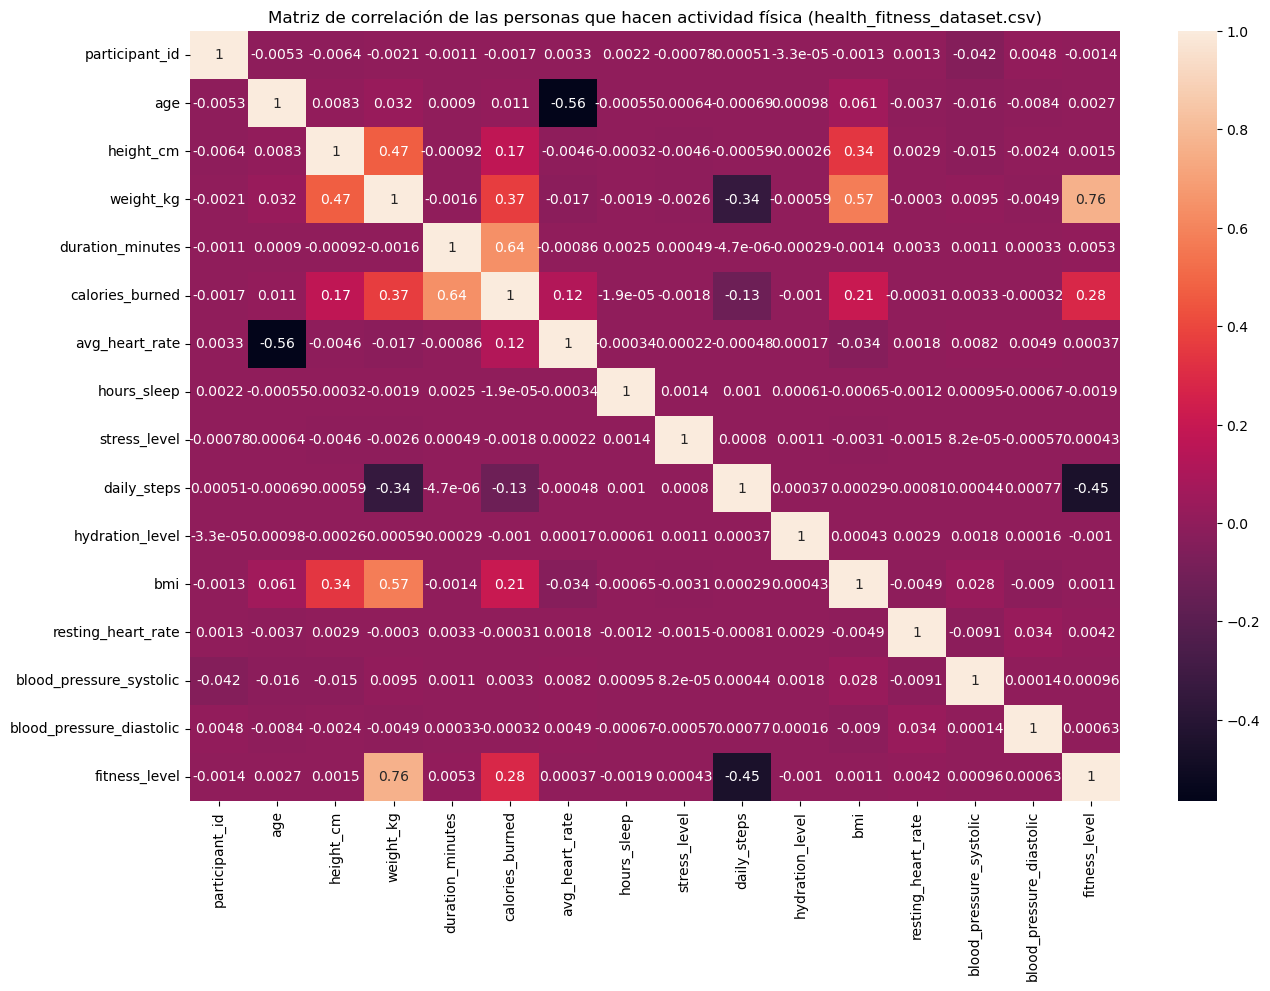

In [13]:
# Selecciona solo las variables cuantitativas del conjunto de datos
dataset_health_cn = dataset_health.select_dtypes(include=['float64', 'int64'])
corr_health = dataset_health_cn.corr()

# Generar matriz de correlación
plt.figure(figsize= [15,10])
plt.title("Matriz de correlación de las personas que hacen actividad física (health_fitness_dataset.csv)")
sns.heatmap(corr_health, annot=True)

#### 2.A.6 Gráfico de boxplot (Distribución de calorias quemadas por tipo de ejercicio)

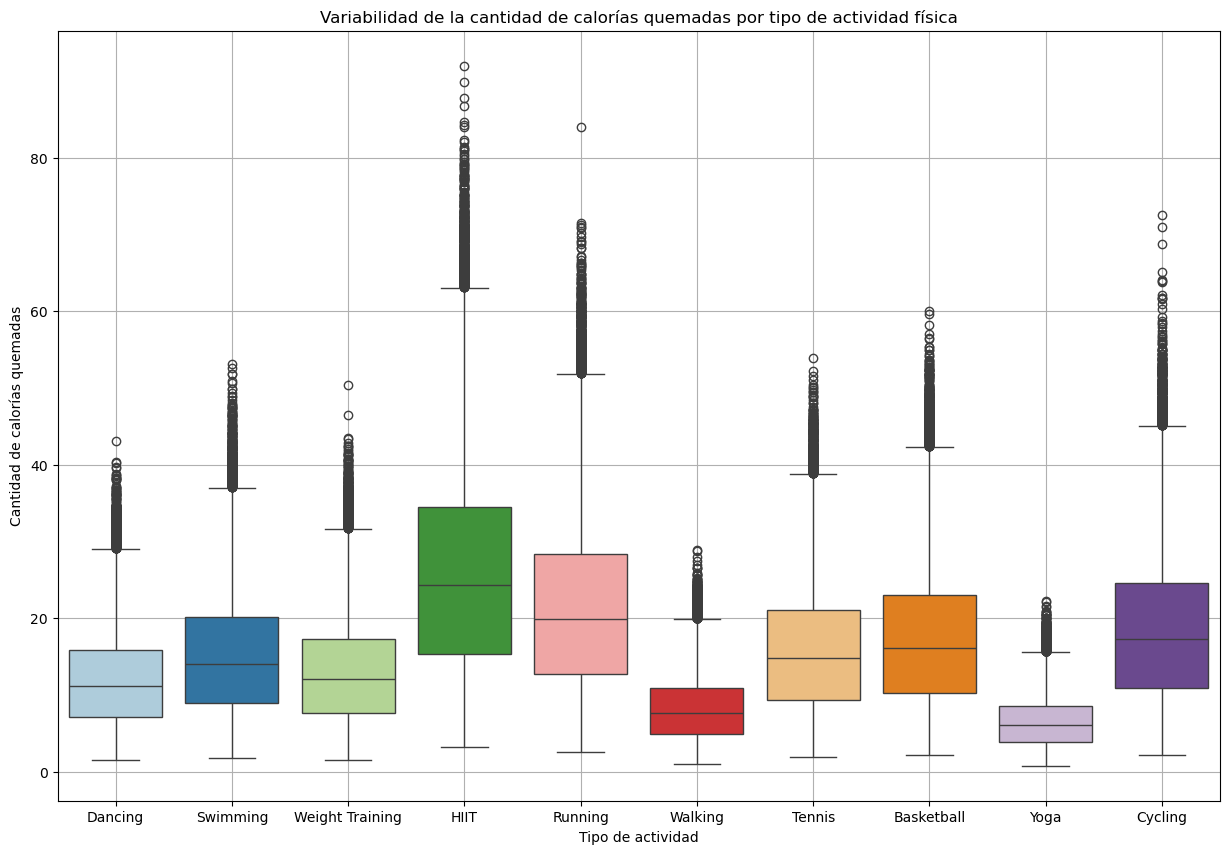

In [14]:
plt.figure(figsize=[15,10])
sns.boxplot(x='activity_type', y='calories_burned', data=dataset_health,
           palette= sns.color_palette("Paired"))
plt.title("Variabilidad de la cantidad de calorías quemadas por tipo de actividad física")
plt.xlabel("Tipo de actividad")
plt.ylabel("Cantidad de calorías quemadas")
plt.grid()
plt.xticks()
plt.show()

#### 2.A.7 Gráfico de barras para conocer la distribución de las personas por genero

In [15]:
# Generar un dataframe donde solo agrupe a los 3000 participantes existentes en el conjunto de datos
genero = pd.DataFrame(dataset_health.groupby(['participant_id','gender'])['participant_id'].count())
genero = genero.drop(columns=['participant_id'])
genero = genero.reset_index()
genero

,participant_id,gender
0,1,F
1,2,M
2,3,F
3,4,F
4,5,M
...,...,...
2995,2996,M
2996,2997,M
2997,2998,M
2998,2999,F


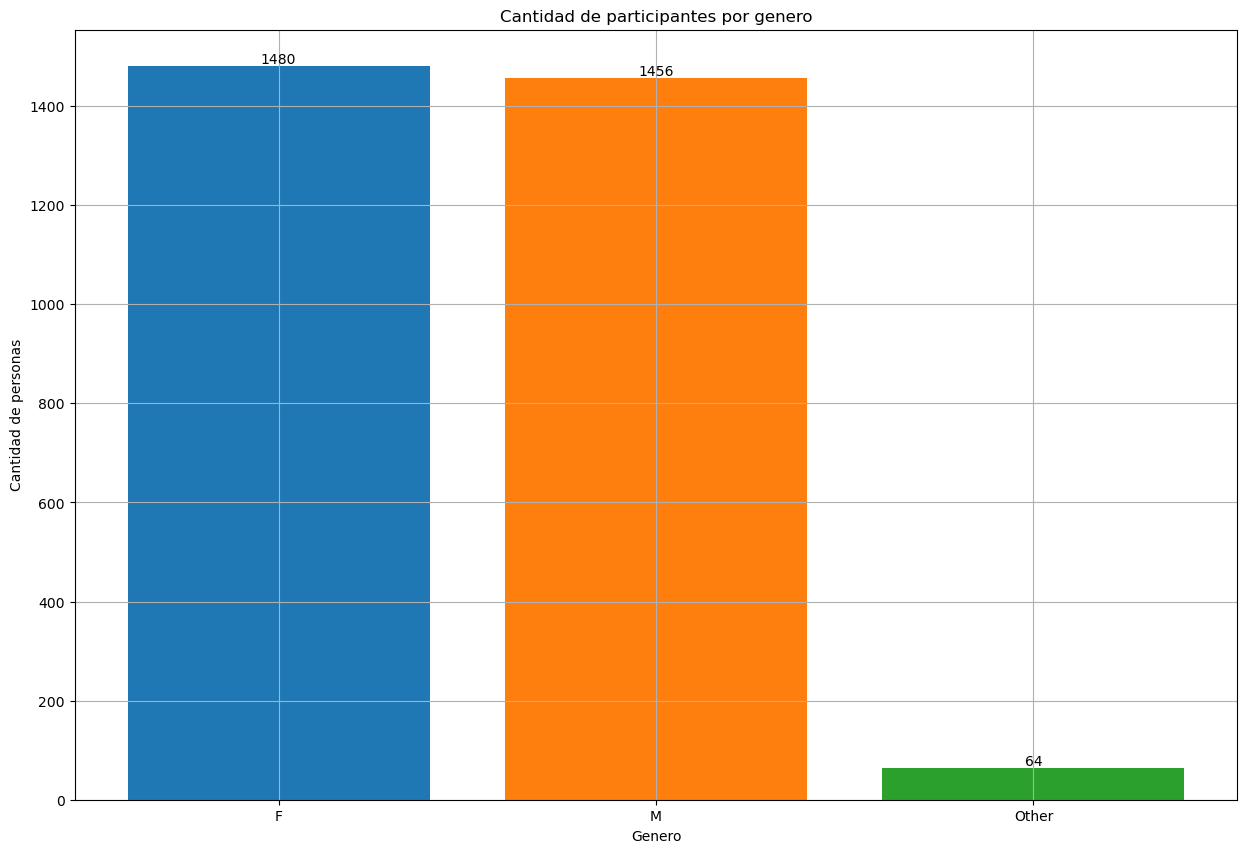

In [16]:
# Utilizar matplot para generar el gráfico de barras utilizando la agrupación anterior (valores unicos: X, conteos: Y)
plt.figure(figsize=[15,10])
barras = plt.bar(x=genero['gender'].unique(), height=genero['gender'].value_counts()
                , color= sns.color_palette())
plt.title("Cantidad de participantes por genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.bar_label(barras)
plt.show()

### _2.B EDA para dataset gym_members_exercise_tracking.csv_

### 2.B.1 Información del conjunto de datos

In [17]:
# Información
# 15 variablaes en total (7 reales, 6 enteros, y 2 cadenas de texto)
# 973 registros del conjunto de datos
# Variables con datos nulos: Ninguno tiene datos nulos
dataset_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [18]:
# Obtener duplicados (No existen duplicados en el conjunto gym_members_exercise_tracking.csv)
dataset_gym.duplicated().sum()

np.int64(0)

In [19]:
dataset_gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [20]:
# # Generar configuraciones para observar el número de columnas y registros completo
# pd.set_option("display.max_rows", None) # Generar todas las filas en el dataset
# pd.set_option("display.max_columns", None) # Generar todas las columnas en el dataset


In [21]:
dataset_gym.head(400)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26,Female,64.1,1.50,194,134,60,1.93,1293.0,Strength,15.1,2.7,5,3,28.49
396,29,Male,86.7,1.62,174,122,55,1.52,1020.0,Strength,13.9,3.5,4,3,33.04
397,18,Female,62.0,1.59,190,162,50,1.23,996.0,Strength,33.2,2.2,4,2,24.52
398,18,Female,58.1,1.61,175,150,71,1.90,1425.0,Yoga,15.3,2.7,4,3,22.41


#### 2.A.3 Medidas de tendencia central y variabilidad

In [22]:
dataset_gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


#### 2.A.4 Obtener valores unicos (Variables cuanlitativas) -Se excluye date por ser una cantidad muy variable-

In [23]:
# Selecciona solo las variables cualitativas del conjunto de datos
dataset_gym_cn = dataset_gym.select_dtypes(include=['object'])
dataset_gym_cn

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength
...,...,...
968,Male,Strength
969,Male,Strength
970,Female,Cardio
971,Male,HIIT


- Valores unicos para la variable Gender (Genero)

In [24]:
# Utilizar los indices de la función value counts, encargado de contar las coincidencias de cada dato unico
# Se aplica con los demas variables
print(dataset_gym_cn['Gender'].value_counts().index,
      "\n Cantidad de datos unicos: ",len(dataset_gym_cn['Gender'].value_counts().index))

Index(['Male', 'Female'], dtype='object', name='Gender') 
 Cantidad de datos unicos:  2


- Valores unicos para la variable activity_type (Tipo de actividad)

In [25]:
print(dataset_gym_cn['Workout_Type'].value_counts().index,
      "\n Cantidad de datos unicos: ",len(dataset_gym_cn['Workout_Type'].value_counts().index))

Index(['Strength', 'Cardio', 'Yoga', 'HIIT'], dtype='object', name='Workout_Type') 
 Cantidad de datos unicos:  4


#### 2.A.5 Matriz de correlación (Variables cuantitativas)

<Axes: title={'center': 'Matriz de correlación de las personas que hacen actividad física (gym_fitness_dataset.csv)'}>

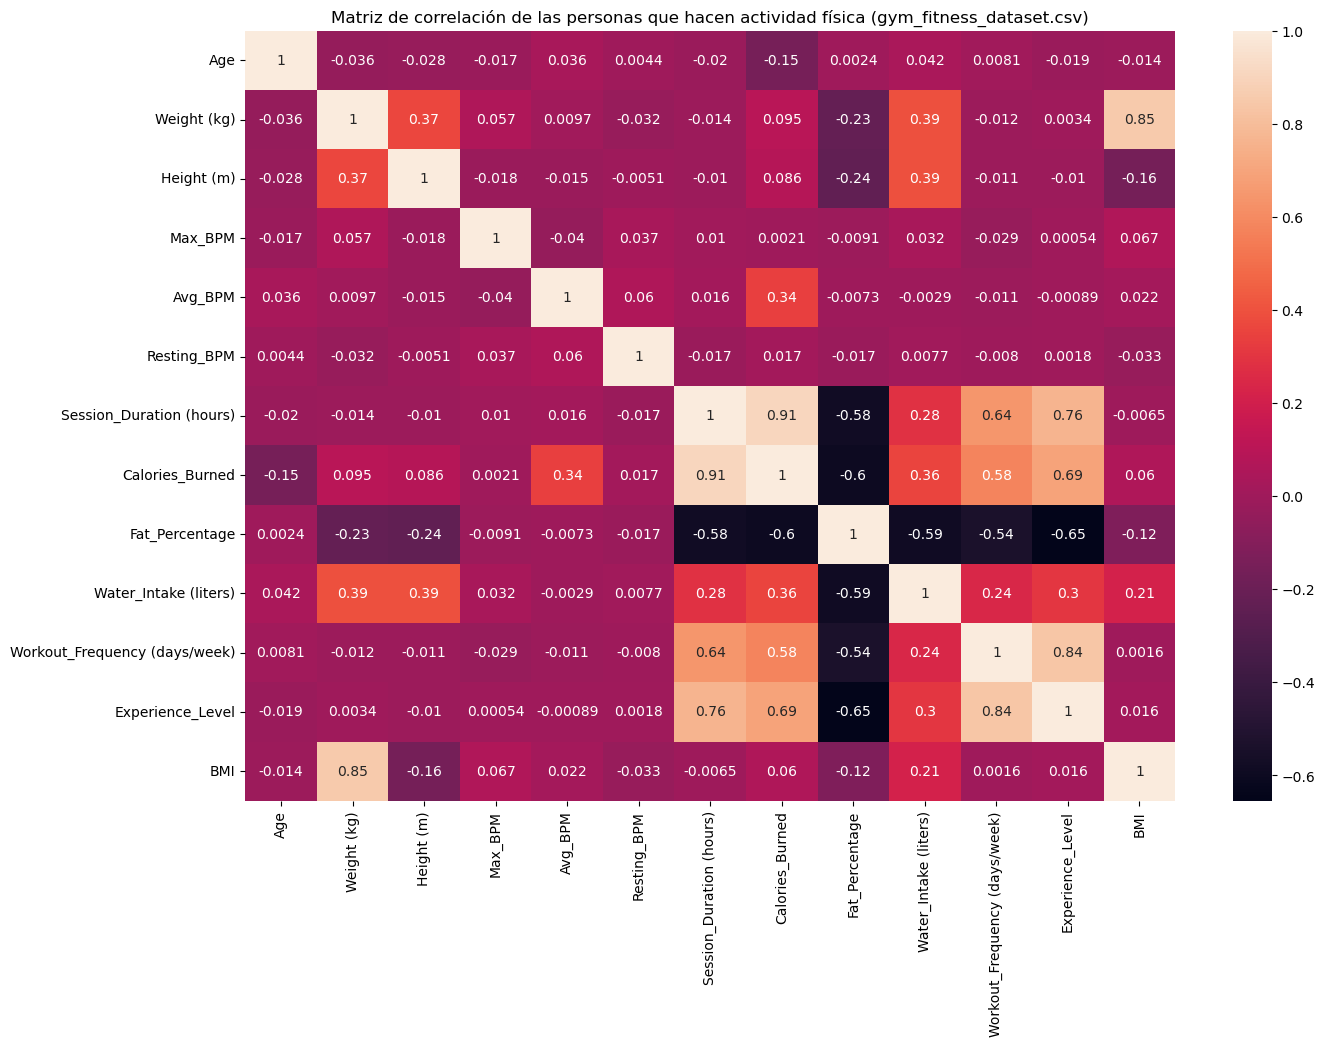

In [26]:
# Selecciona solo las variables cuantitativas del conjunto de datos
dataset_gym_cn = dataset_gym.select_dtypes(include=['float64', 'int64'])
corr_gym = dataset_gym_cn.corr()

# Generar matriz de correlación
plt.figure(figsize= [15,10])
plt.title("Matriz de correlación de las personas que hacen actividad física (gym_fitness_dataset.csv)")
sns.heatmap(corr_gym, annot=True)

### 2.B.6 Gráfico de boxplot (Distribución de calorias quemadas por tipo de ejercicio)

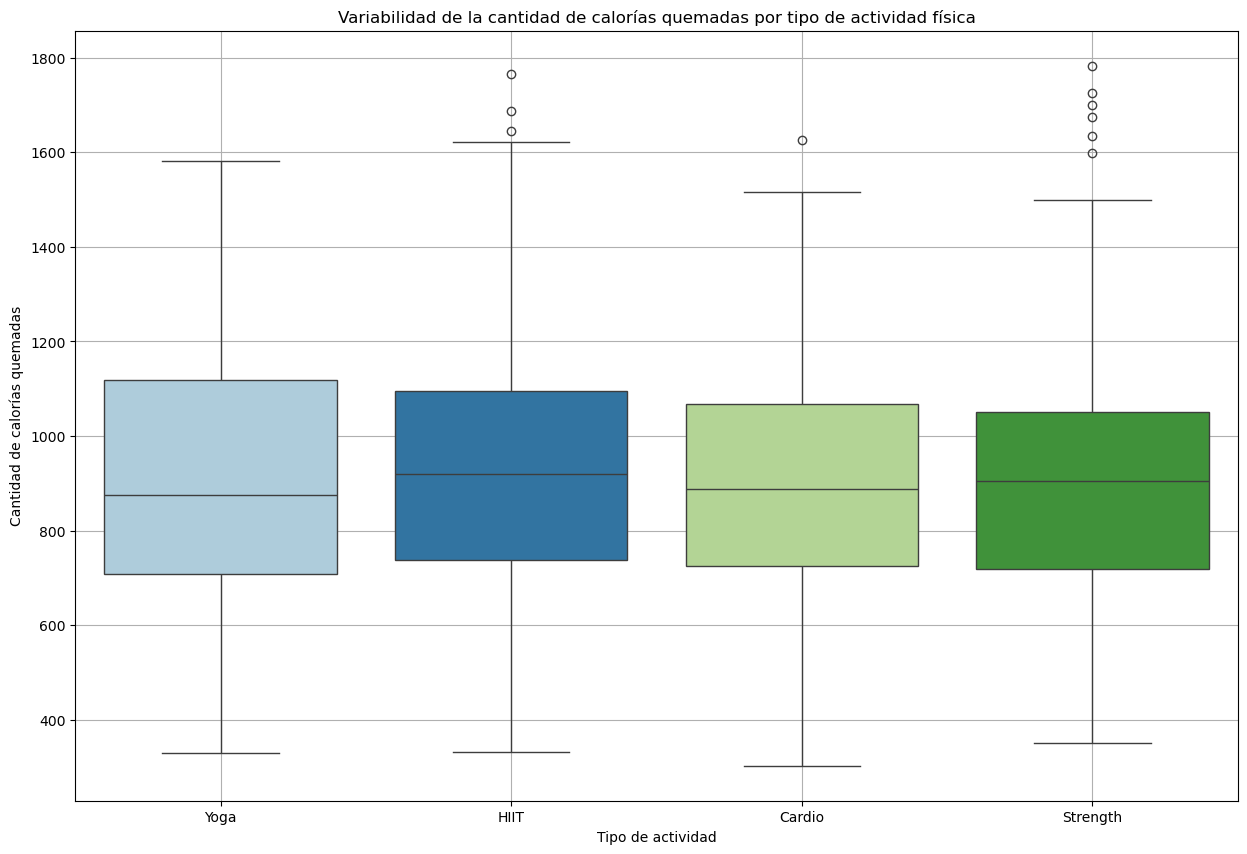

In [27]:
plt.figure(figsize=[15,10])
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=dataset_gym,
           palette= sns.color_palette("Paired"))
plt.title("Variabilidad de la cantidad de calorías quemadas por tipo de actividad física")
plt.xlabel("Tipo de actividad")
plt.ylabel("Cantidad de calorías quemadas")
plt.grid()
plt.xticks()
plt.show()

#### 2.B.7 Gráfico de barras para conocer la distribución de las personas por genero

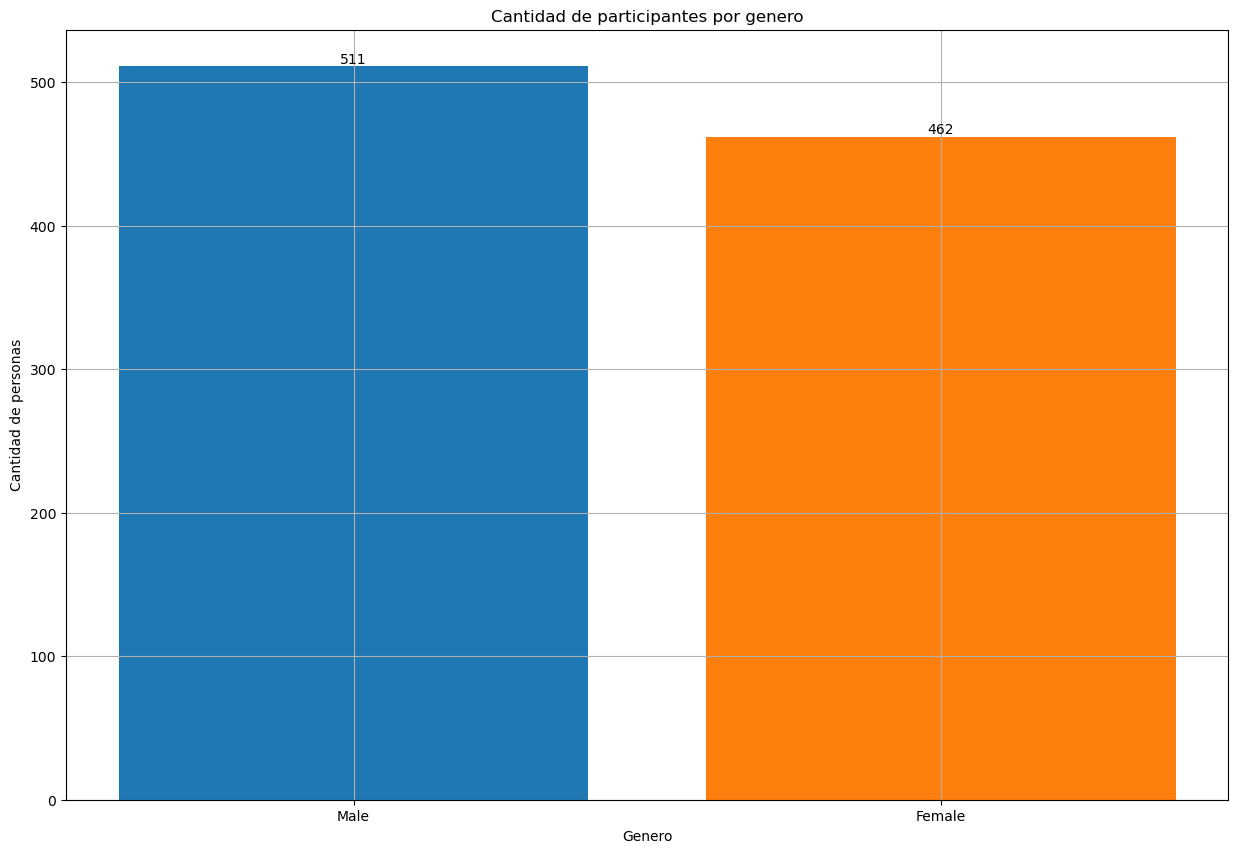

In [28]:
# Utilizar matplot para generar el gráfico de barras utilizando la agrupación anterior (valores unicos: X, conteos: Y)
plt.figure(figsize=[15,10])
barras = plt.bar(x=dataset_gym['Gender'].unique(), height=dataset_gym['Gender'].value_counts()
                , color= sns.color_palette())
plt.title("Cantidad de participantes por genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.bar_label(barras)
plt.show()

### 3. Transformación y limpieza de los datos
### 3.A Conjunto de datos: health_fitness_dataset.csv

In [29]:
# Obtiene todas las columnas que existen en el conjunto de datos.
print(dataset_health.columns)

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'activity_type', 'duration_minutes', 'intensity', 'calories_burned',
       'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'bmi', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'health_condition', 'smoking_status', 'fitness_level'],
      dtype='object')


#### 3.A.1 Filtrar características por variables cualitativas y cuantitativas

In [30]:
# Característica cualitativas
health_cuali = pd.DataFrame(dataset_health[['participant_id', 'activity_type', 'date', 'gender','intensity']])
health_cuali

,participant_id,activity_type,date,gender,intensity
0,1,Dancing,2024-01-01,F,Low
1,1,Swimming,2024-01-04,F,Low
2,1,Swimming,2024-01-05,F,Medium
3,1,Weight Training,2024-01-07,F,Medium
4,1,Swimming,2024-01-09,F,Medium
...,...,...,...,...,...
687696,3000,Basketball,2024-12-19,F,Medium
687697,3000,Basketball,2024-12-20,F,Low
687698,3000,Yoga,2024-12-21,F,Low
687699,3000,Basketball,2024-12-22,F,Medium


In [31]:
# Característica cuantitativas agrupadas por id y tipo de actividad
health_cuant = pd.DataFrame(dataset_health.groupby(['participant_id', 'activity_type'])[['age','height_cm', 'weight_kg',
                                                      'duration_minutes', 'calories_burned',
                                                      'avg_heart_rate', 'stress_level']].mean())
health_cuant

age  height_cm  weight_kg  duration_minutes  \
participant_id activity_type                                                   
1              Basketball       56.0      165.3  77.364706         60.882353   
               Cycling          56.0      165.3  87.870000         60.200000   
               Dancing          56.0      165.3  71.390909         77.863636   
               HIIT             56.0      165.3  85.681579         69.500000   
               Running          56.0      165.3  90.506250         70.000000   
...                              ...        ...        ...               ...   
3000           Swimming         38.0      165.7  83.237500         65.812500   
               Tennis           38.0      165.7  89.252941         69.647059   
               Walking          38.0      165.7  91.427778         67.555556   
               Weight Training  38.0      165.7  92.207143         55.642857   
               Yoga             38.0      165.7  87.288889         68.466667   

                                calories_burned  avg_heart_rate  stress_level  
participant_id activity_type                                                   
1              Basketball             11.923529      118.705882      5.705882  
               Cycling                15.170000      130.100000      4.200000  
               Dancing                 9.713636      116.227273      5.318182  
               HIIT                   24.176316      123.184211      5.263158  
               Running                20.231250      119.375000      4.937500  
...                                         ...             ...           ...  
3000           Swimming               12.793750      133.062500      5.250000  
               Tennis                 14.994118      132.823529      4.705882  
               Walking                 7.783333      130.611111      3.722222  
               Weight Training         9.700000      133.714286      6.285714  
               Yoga                    5.684444      133.111111      5.000000  

[29965 rows x 7 columns]

#### 3.A.2 Combinar tablas de variables cuantitativas y cualitativas por ID


In [32]:
# COMBINAR AMBAS TABLAS PARA OBTENER LA REPRESENTACIÓN
health_ex = pd.merge(left=health_cuant, right=health_cuali, on=['participant_id', 'activity_type'], how='outer')
health_ex

,participant_id,activity_type,age,height_cm,weight_kg,duration_minutes,calories_burned,avg_heart_rate,stress_level,date,gender,intensity
0,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-02-23,F,High
1,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-02-27,F,Medium
2,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-03-01,F,High
3,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-03-03,F,Low
4,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-03-07,F,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
687696,3000,Yoga,38.0,165.7,87.288889,68.466667,5.684444,133.111111,5.000000,2024-12-11,F,Medium
687697,3000,Yoga,38.0,165.7,87.288889,68.466667,5.684444,133.111111,5.000000,2024-12-13,F,Low
687698,3000,Yoga,38.0,165.7,87.288889,68.466667,5.684444,133.111111,5.000000,2024-12-18,F,Medium
687699,3000,Yoga,38.0,165.7,87.288889,68.466667,5.684444,133.111111,5.000000,2024-12-21,F,Low


#### 3.A.3 Eliminar tipo de actividad y id duplicados

In [33]:
# Eliminar los duplicados que quedaron con la misma información
health_ex = health_ex.drop_duplicates(subset=['activity_type', 'participant_id'], keep='last')

In [34]:
# Ordenar datos por id
health_ex = health_ex.sort_values(['participant_id', 'activity_type'])
health_ex

,participant_id,activity_type,age,height_cm,weight_kg,duration_minutes,calories_burned,avg_heart_rate,stress_level,date,gender,intensity
16,1,Basketball,56.0,165.3,77.364706,60.882353,11.923529,118.705882,5.705882,2024-07-01,F,Low
26,1,Cycling,56.0,165.3,87.870000,60.200000,15.170000,130.100000,4.200000,2024-11-23,F,Medium
48,1,Dancing,56.0,165.3,71.390909,77.863636,9.713636,116.227273,5.318182,2024-08-01,F,Medium
86,1,HIIT,56.0,165.3,85.681579,69.500000,24.176316,123.184211,5.263158,2024-12-18,F,Low
102,1,Running,56.0,165.3,90.506250,70.000000,20.231250,119.375000,4.937500,2024-10-28,F,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
687606,3000,Swimming,38.0,165.7,83.237500,65.812500,12.793750,133.062500,5.250000,2024-11-09,F,Low
687623,3000,Tennis,38.0,165.7,89.252941,69.647059,14.994118,132.823529,4.705882,2024-09-18,F,Medium
687641,3000,Walking,38.0,165.7,91.427778,67.555556,7.783333,130.611111,3.722222,2024-11-14,F,Medium
687655,3000,Weight Training,38.0,165.7,92.207143,55.642857,9.700000,133.714286,6.285714,2024-11-28,F,Low


#### 3.A.4 Separar características por tabla (Agregar tipo de actividad como código númerico)

In [35]:
# Aeparar Datframes separados las caracteristicas para cada categoria (Persona, rutinas y ejercicios)
persona_prop = health_ex[['participant_id','age','gender', 'height_cm', 'weight_kg']]
rutinas = health_ex[['activity_type', 'duration_minutes', 'calories_burned',
                              'avg_heart_rate', 'stress_level', 'participant_id']]

# Generar dataframe solo para actividad física
ejercicios = pd.DataFrame(health_ex['activity_type'].unique())
ejercicios['code'] = ejercicios.index + 1

In [36]:
# Para persona
persona_prop

,participant_id,age,gender,height_cm,weight_kg
16,1,56.0,F,165.3,77.364706
26,1,56.0,F,165.3,87.870000
48,1,56.0,F,165.3,71.390909
86,1,56.0,F,165.3,85.681579
102,1,56.0,F,165.3,90.506250
...,...,...,...,...,...
687606,3000,38.0,F,165.7,83.237500
687623,3000,38.0,F,165.7,89.252941
687641,3000,38.0,F,165.7,91.427778
687655,3000,38.0,F,165.7,92.207143


In [37]:
# Para rutinas de ejercicio
rutinas

,activity_type,duration_minutes,calories_burned,avg_heart_rate,stress_level,participant_id
16,Basketball,60.882353,11.923529,118.705882,5.705882,1
26,Cycling,60.200000,15.170000,130.100000,4.200000,1
48,Dancing,77.863636,9.713636,116.227273,5.318182,1
86,HIIT,69.500000,24.176316,123.184211,5.263158,1
102,Running,70.000000,20.231250,119.375000,4.937500,1
...,...,...,...,...,...,...
687606,Swimming,65.812500,12.793750,133.062500,5.250000,3000
687623,Tennis,69.647059,14.994118,132.823529,4.705882,3000
687641,Walking,67.555556,7.783333,130.611111,3.722222,3000
687655,Weight Training,55.642857,9.700000,133.714286,6.285714,3000


In [38]:
# Ejercicios que se aplican en el conjunto de datos (Cambiar nombre a la columna con la que esta escrito)
ejercicios = ejercicios.rename(columns={0:'activity_type'})
ejercicios

,activity_type,code
0,Basketball,1
1,Cycling,2
2,Dancing,3
3,HIIT,4
4,Running,5
5,Swimming,6
6,Tennis,7
7,Walking,8
8,Weight Training,9
9,Yoga,10


In [39]:
# Agregar etiqueta númerica a la tabla rutinas (Utilizando bucles y una lista vacia)
categorias = []
for rutina in rutinas['activity_type']:
    for ejercicio in ejercicios['activity_type']:
        if(rutina == ejercicio):
            categorias.append(ejercicios['code'][ejercicios['activity_type'] == ejercicio].values[0])
            continue
print("Tamaño del arreglo: ", len(np.array(categorias)), "\n",
     np.array(categorias))

Tamaño del arreglo:  29965 
 [ 1  2  3 ...  8  9 10]


In [40]:
# Obtener indice del tipo de deporte por medio de un bucle for que recorre las actividades existentes en el conjunto de datos
for ejercicio in ejercicios['activity_type']:
    print(ejercicios['code'][ejercicios['activity_type'] == ejercicio].values[0])

1
2
3
4
5
6
7
8
9
10


#### 3.A.5 Unir conjuntos de datos separados por ID y tipo de actividad


In [41]:
### Conjuntos de datos para base de datos final (Con sus claves foraneas)
# Agrupación de la tabla (Personas)
resumen_personas = pd.DataFrame(persona_prop.groupby(['participant_id', 'gender'])[['age','height_cm', 'weight_kg']].mean()).reset_index()
resumen_personas

,participant_id,gender,age,height_cm,weight_kg
0,1,F,56.0,165.3,84.341411
1,2,M,40.0,177.6,107.003280
2,3,F,23.0,158.4,94.103271
3,4,F,37.0,167.2,100.236015
4,5,M,50.0,172.0,115.794081
...,...,...,...,...,...
2995,2996,M,33.0,174.9,101.753874
2996,2997,M,26.0,172.1,95.894471
2997,2998,M,24.0,170.1,98.220851
2998,2999,F,52.0,150.6,74.365504


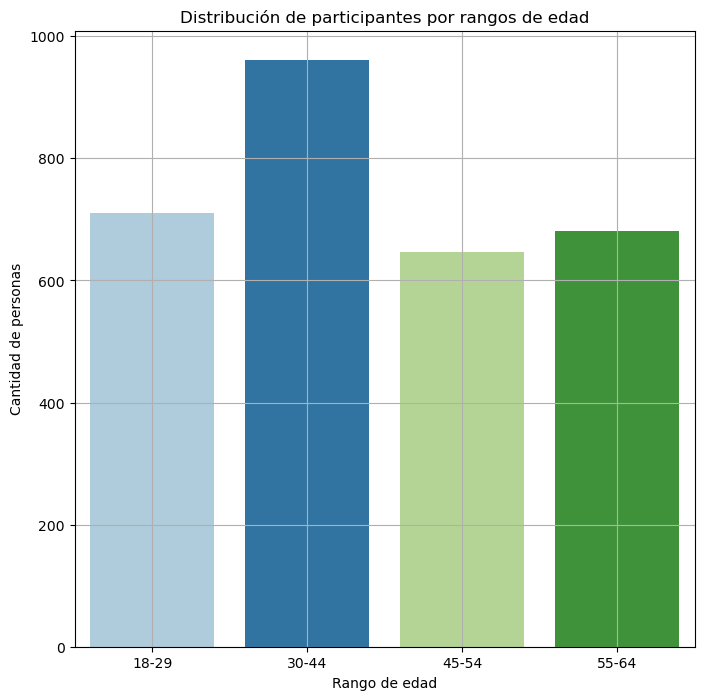

In [42]:
#Crear columna de rangos de edad en resumen_personas
bins = [18, 30, 45, 55, 65]
labels = ['18-29', '30-44', '45-54', '55-64']
resumen_personas['age_range'] = pd.cut(resumen_personas['age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=[8,8])
sns.countplot(x='age_range', data=resumen_personas, palette=sns.color_palette("Paired"))
plt.title("Distribución de participantes por rangos de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.show()

In [43]:
# Generar y modificar columnas para la tabla persona (Height_cm, generar IMC)
print(resumen_personas.columns, "\n",
     resumen_personas.columns[3]) # Señala el valor de la columna
resumen_personas = resumen_personas.rename(columns={resumen_personas.columns[3]:"height_mts"})

# Conversión de cm a mts para la altura de una persona (Height)
resumen_personas[resumen_personas.columns[3]] = resumen_personas["height_mts"]/100

Index(['participant_id', 'gender', 'age', 'height_cm', 'weight_kg',
       'age_range'],
      dtype='object') 
 height_cm


In [44]:
# Calcular indice de masa corporal (IMC)
resumen_personas['imc'] = resumen_personas["weight_kg"]/pow(resumen_personas["height_mts"], 2)
resumen_personas

,participant_id,gender,age,height_mts,weight_kg,age_range,imc
0,1,F,56.0,1.653,84.341411,55-64,30.867052
1,2,M,40.0,1.776,107.003280,30-44,33.924321
2,3,F,23.0,1.584,94.103271,18-29,37.505449
3,4,F,37.0,1.672,100.236015,30-44,35.855126
4,5,M,50.0,1.720,115.794081,45-54,39.140779
...,...,...,...,...,...,...,...
2995,2996,M,33.0,1.749,101.753874,30-44,33.263760
2996,2997,M,26.0,1.721,95.894471,18-29,32.376644
2997,2998,M,24.0,1.701,98.220851,18-29,33.946505
2998,2999,F,52.0,1.506,74.365504,45-54,32.788502


In [45]:
# Agregar el código de actividad fisica
resumen_rutinas = pd.DataFrame(rutinas)
resumen_rutinas['code_activity'] = np.array(categorias)
resumen_rutinas.head(50)

,activity_type,duration_minutes,calories_burned,avg_heart_rate,stress_level,participant_id,code_activity
16,Basketball,60.882353,11.923529,118.705882,5.705882,1,1
26,Cycling,60.200000,15.170000,130.100000,4.200000,1,2
48,Dancing,77.863636,9.713636,116.227273,5.318182,1,3
86,HIIT,69.500000,24.176316,123.184211,5.263158,1,4
102,Running,70.000000,20.231250,119.375000,4.937500,1,5
119,Swimming,50.764706,9.535294,120.235294,4.588235,1,6
153,Tennis,73.235294,15.302941,119.911765,5.382353,1,7
171,Walking,71.500000,9.105556,119.333333,5.333333,1,8
196,Weight Training,71.400000,10.444000,121.800000,5.280000,1,9
232,Yoga,73.694444,5.861111,121.055556,4.555556,1,10


In [46]:
# Generar dataframe con columnas modificadas para ejercicio
resumen_ejercicios = pd.DataFrame(ejercicios[['code', 'activity_type']])
resumen_ejercicios

,code,activity_type
0,1,Basketball
1,2,Cycling
2,3,Dancing
3,4,HIIT
4,5,Running
5,6,Swimming
6,7,Tennis
7,8,Walking
8,9,Weight Training
9,10,Yoga


In [47]:
## Revisar columnas de los datasets
print(resumen_personas.columns, "\n")
print(resumen_rutinas.columns, "\n")
print(resumen_ejercicios.columns, "\n")

Index(['participant_id', 'gender', 'age', 'height_mts', 'weight_kg',
       'age_range', 'imc'],
      dtype='object') 

Index(['activity_type', 'duration_minutes', 'calories_burned',
       'avg_heart_rate', 'stress_level', 'participant_id', 'code_activity'],
      dtype='object') 

Index(['code', 'activity_type'], dtype='object') 



In [48]:
# Combinar el conjunto de datos de las personas y rutinas para obtener el conjunto ed datos completo
resumen_health_final = pd.merge(left=resumen_personas, right=resumen_rutinas, on='participant_id', how='outer')
resumen_health_final.head(50)

,participant_id,gender,age,height_mts,weight_kg,age_range,imc,activity_type,duration_minutes,calories_burned,avg_heart_rate,stress_level,code_activity
0,1,F,56.0,1.653,84.341411,55-64,30.867052,Basketball,60.882353,11.923529,118.705882,5.705882,1
1,1,F,56.0,1.653,84.341411,55-64,30.867052,Cycling,60.200000,15.170000,130.100000,4.200000,2
2,1,F,56.0,1.653,84.341411,55-64,30.867052,Dancing,77.863636,9.713636,116.227273,5.318182,3
3,1,F,56.0,1.653,84.341411,55-64,30.867052,HIIT,69.500000,24.176316,123.184211,5.263158,4
4,1,F,56.0,1.653,84.341411,55-64,30.867052,Running,70.000000,20.231250,119.375000,4.937500,5
5,1,F,56.0,1.653,84.341411,55-64,30.867052,Swimming,50.764706,9.535294,120.235294,4.588235,6
6,1,F,56.0,1.653,84.341411,55-64,30.867052,Tennis,73.235294,15.302941,119.911765,5.382353,7
7,1,F,56.0,1.653,84.341411,55-64,30.867052,Walking,71.500000,9.105556,119.333333,5.333333,8
8,1,F,56.0,1.653,84.341411,55-64,30.867052,Weight Training,71.400000,10.444000,121.800000,5.280000,9
9,1,F,56.0,1.653,84.341411,55-64,30.867052,Yoga,73.694444,5.861111,121.055556,4.555556,10


#### 3.A.5.1 Codificar variables caregoricas (Genero)

In [49]:
# Codificar variable categorica "genero" utilizando ordinalEncoder
generos = resumen_health_final['gender'].value_counts().index
ordinal = OrdinalEncoder(categories=[generos.tolist()])

resumen_health_final['code_gender'] = ordinal.fit_transform(resumen_health_final[['gender']])



#### 3.A.6 Conjunto de datos en limpio FINAL (health_fitness_cleaned.csv)

In [50]:
resumen_health_final

,participant_id,gender,age,height_mts,weight_kg,age_range,imc,activity_type,duration_minutes,calories_burned,avg_heart_rate,stress_level,code_activity,code_gender
0,1,F,56.0,1.653,84.341411,55-64,30.867052,Basketball,60.882353,11.923529,118.705882,5.705882,1,0.0
1,1,F,56.0,1.653,84.341411,55-64,30.867052,Cycling,60.200000,15.170000,130.100000,4.200000,2,0.0
2,1,F,56.0,1.653,84.341411,55-64,30.867052,Dancing,77.863636,9.713636,116.227273,5.318182,3,0.0
3,1,F,56.0,1.653,84.341411,55-64,30.867052,HIIT,69.500000,24.176316,123.184211,5.263158,4,0.0
4,1,F,56.0,1.653,84.341411,55-64,30.867052,Running,70.000000,20.231250,119.375000,4.937500,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,3000,F,38.0,1.657,85.396620,30-44,31.102526,Swimming,65.812500,12.793750,133.062500,5.250000,6,0.0
29961,3000,F,38.0,1.657,85.396620,30-44,31.102526,Tennis,69.647059,14.994118,132.823529,4.705882,7,0.0
29962,3000,F,38.0,1.657,85.396620,30-44,31.102526,Walking,67.555556,7.783333,130.611111,3.722222,8,0.0
29963,3000,F,38.0,1.657,85.396620,30-44,31.102526,Weight Training,55.642857,9.700000,133.714286,6.285714,9,0.0


In [51]:
# Generar archivo CSV para el conjunto de datos health_fitness_dataset.csv
resumen_health_final.to_csv('health_fitness_cleaned.csv', sep=',', index=False, encoding='utf-8')

### 3.B Conjunto de datos: gym_members_exercise_tracking.csv

In [52]:
# Mostrar conjunto de datos
dataset_gym

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


#### 3.B.1 Transformación de las columnas para el conjunto de datos

In [53]:
# Filtrar columnas necesarias para el estudio de quema de calorías para el conjunto de datos gym_members_exercise_tracking.csv
filtred_df = pd.DataFrame(dataset_gym, columns=['Age','Gender','Height (m)','Weight (kg)','Session_Duration (hours)','Avg_BPM','Calories_Burned','Workout_Type','BMI'])
filtred_df

,Age,Gender,Height (m),Weight (kg),Session_Duration (hours),Avg_BPM,Calories_Burned,Workout_Type,BMI
0,56,Male,1.71,88.3,1.69,157,1313.0,Yoga,30.20
1,46,Female,1.53,74.9,1.30,151,883.0,HIIT,32.00
2,32,Female,1.66,68.1,1.11,122,677.0,Cardio,24.71
3,25,Male,1.70,53.2,0.59,164,532.0,Strength,18.41
4,38,Male,1.79,46.1,0.64,158,556.0,Strength,14.39
...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,87.1,1.57,158,1364.0,Strength,28.77
969,25,Male,1.61,66.6,1.38,166,1260.0,Strength,25.69
970,59,Female,1.76,60.4,1.72,120,929.0,Cardio,19.50
971,32,Male,1.83,126.4,1.10,146,883.0,HIIT,37.74


In [54]:
# Renombrar columnas que coincidan con el dataset: health_fitness_dataset.csv
# Por medio de un diccionario (Clave: valor)
df_1 = filtred_df.rename(columns={'Age':'age','Gender':'gender','Height (m)': 'height_mts', 'Weight (kg)': 'weight_kg', 'Session_Duration (hours)': 'duration_minutes', 'Avg_BPM': 'avg_heart_rate','Calories_Burned': 'calories_burned', 'Workout_Type': 'activity_type','BMI':'imc'})
df_1

,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc
0,56,Male,1.71,88.3,1.69,157,1313.0,Yoga,30.20
1,46,Female,1.53,74.9,1.30,151,883.0,HIIT,32.00
2,32,Female,1.66,68.1,1.11,122,677.0,Cardio,24.71
3,25,Male,1.70,53.2,0.59,164,532.0,Strength,18.41
4,38,Male,1.79,46.1,0.64,158,556.0,Strength,14.39
...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,87.1,1.57,158,1364.0,Strength,28.77
969,25,Male,1.61,66.6,1.38,166,1260.0,Strength,25.69
970,59,Female,1.76,60.4,1.72,120,929.0,Cardio,19.50
971,32,Male,1.83,126.4,1.10,146,883.0,HIIT,37.74


In [55]:
# Convertir columna duracion (horas) a minutos
df_1['duration_minutes'] = df_1['duration_minutes'] * 60
df_1

,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc
0,56,Male,1.71,88.3,101.4,157,1313.0,Yoga,30.20
1,46,Female,1.53,74.9,78.0,151,883.0,HIIT,32.00
2,32,Female,1.66,68.1,66.6,122,677.0,Cardio,24.71
3,25,Male,1.70,53.2,35.4,164,532.0,Strength,18.41
4,38,Male,1.79,46.1,38.4,158,556.0,Strength,14.39
...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,87.1,94.2,158,1364.0,Strength,28.77
969,25,Male,1.61,66.6,82.8,166,1260.0,Strength,25.69
970,59,Female,1.76,60.4,103.2,120,929.0,Cardio,19.50
971,32,Male,1.83,126.4,66.0,146,883.0,HIIT,37.74


In [56]:
# Convertir columna calorias quemadas por hora, a calorias quemadas por minuto
df_1['calories_burned'] = df_1['calories_burned'] / df_1['duration_minutes']
df_1

,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc
0,56,Male,1.71,88.3,101.4,157,12.948718,Yoga,30.20
1,46,Female,1.53,74.9,78.0,151,11.320513,HIIT,32.00
2,32,Female,1.66,68.1,66.6,122,10.165165,Cardio,24.71
3,25,Male,1.70,53.2,35.4,164,15.028249,Strength,18.41
4,38,Male,1.79,46.1,38.4,158,14.479167,Strength,14.39
...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,87.1,94.2,158,14.479830,Strength,28.77
969,25,Male,1.61,66.6,82.8,166,15.217391,Strength,25.69
970,59,Female,1.76,60.4,103.2,120,9.001938,Cardio,19.50
971,32,Male,1.83,126.4,66.0,146,13.378788,HIIT,37.74


In [57]:
# Mapeo de tipo de actividad y genero (Establecidos como en el dataset anterior)
df_1['activity_type'].unique()
activity_mapping = {
    'Cardio': 11,
    'Strength': 12,
    'Yoga': 10,
    'HIIT': 4
}

gender_mapping = {
    'Male':1,
    'Female':0
}
df_1['code_activity'] = df_1['activity_type'].map(activity_mapping)
df_1['code_gender'] = df_1['gender'].map(gender_mapping)


#### 3.B.2 Conjunto de datos en limpio FINAL (gym_members_exercise_tracking.csv)

In [58]:
# Exportar el dataframe a un archivo CSV  gym_members_exercise_tracking.csv
df_1.to_csv('gym_members_cleaned.csv', index=False)

### 3.C Unificación de los conjuntos de datos propuestos en limpio (Conjunto definitivo)

#### 3.C.1 Catalogar, por dataframe, cada conjunto de datos

In [59]:
df_1 = pd.read_csv("gym_members_cleaned.csv")
df_2 = pd.read_csv("health_fitness_cleaned.csv")

In [60]:
# Ordenar valores de df_2 por quema de calorias
df_2.sort_values('calories_burned', ascending=False)

,participant_id,gender,age,height_mts,weight_kg,age_range,imc,activity_type,duration_minutes,calories_burned,avg_heart_rate,stress_level,code_activity,code_gender
19131,1916,M,64.0,1.836,160.227729,55-64,47.532683,Running,93.555556,56.711111,113.555556,5.000000,5,1.0
16246,1627,M,45.0,1.930,152.841003,45-54,41.032243,HIIT,76.650000,49.530000,132.550000,5.050000,4,1.0
7113,713,M,57.0,1.855,143.049767,55-64,41.571848,HIIT,81.166667,49.416667,123.888889,5.222222,4,1.0
10301,1032,M,45.0,1.748,111.675208,45-54,36.548866,HIIT,83.428571,48.514286,147.285714,5.714286,4,1.0
17785,1781,M,29.0,1.945,142.741639,18-29,37.732143,HIIT,75.062500,47.625000,146.750000,6.312500,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,765,M,52.0,1.751,85.342631,45-54,27.835161,Walking,39.750000,3.250000,123.750000,6.250000,8,1.0
5390,540,F,53.0,1.566,80.727068,45-54,32.918168,Yoga,59.000000,3.233333,116.333333,3.333333,10,0.0
20206,2023,F,28.0,1.605,75.514569,18-29,29.314378,Yoga,48.125000,3.193750,145.812500,4.625000,10,0.0
4471,448,M,56.0,1.712,102.051658,55-64,34.818699,Yoga,37.857143,3.014286,116.142857,5.285714,10,1.0


#### 3.C.2 Transformación del conjunto de datos (Generar, eliminar columnas y combinar tablas)

In [61]:
# Manejo de regresión lineal para hallar el nivel de estres de la actividad
corr = df_2.corr(numeric_only=True)

# Correlación de stress_level con todas las demás
corr_stress = corr["stress_level"].sort_values(ascending=False)
print(corr_stress)

# Determinar conjunto de variables para aplicar predicción (Utilizando el conjunto de datos health_fitness_cleaned )
X = df_2[["age", "code_activity"]]  # variables predictoras
y = df_2["stress_level"] # Resultado o salida de estres estimado

model = LinearRegression()
model.fit(X, y)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)



stress_level        1.000000
participant_id      0.002388
age                 0.001970
code_activity       0.000474
avg_heart_rate     -0.001157
calories_burned    -0.001824
imc                -0.005074
code_gender        -0.008178
duration_minutes   -0.009571
weight_kg          -0.012829
height_mts         -0.013990
Name: stress_level, dtype: float64
Coeficientes: [0.0001008  0.00011478]
Intercepto: 5.245925694421682


In [62]:
# Generar columna de nivel de estres para el conjunto de datos
X_new = df_1[["age", "code_activity"]]
df_1["stress_level"] = model.predict(X_new)
df_1


,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc,code_activity,code_gender,stress_level
0,56,Male,1.71,88.3,101.4,157,12.948718,Yoga,30.20,10,1,5.252718
1,46,Female,1.53,74.9,78.0,151,11.320513,HIIT,32.00,4,0,5.251022
2,32,Female,1.66,68.1,66.6,122,10.165165,Cardio,24.71,11,0,5.250414
3,25,Male,1.70,53.2,35.4,164,15.028249,Strength,18.41,12,1,5.249823
4,38,Male,1.79,46.1,38.4,158,14.479167,Strength,14.39,12,1,5.251133
...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,1.74,87.1,94.2,158,14.479830,Strength,28.77,12,1,5.249722
969,25,Male,1.61,66.6,82.8,166,15.217391,Strength,25.69,12,1,5.249823
970,59,Female,1.76,60.4,103.2,120,9.001938,Cardio,19.50,11,0,5.253135
971,32,Male,1.83,126.4,66.0,146,13.378788,HIIT,37.74,4,1,5.249610


#### 3.C.3 Concatener/Unir bases de datos (tablas)

In [63]:
df_final = pd.concat([df_1, df_2], ignore_index=True)
df_final

,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc,code_activity,code_gender,stress_level,participant_id,age_range
0,56.0,Male,1.710,88.30000,101.400000,157.000000,12.948718,Yoga,30.200000,10,1.0,5.252718,NaN,NaN
1,46.0,Female,1.530,74.90000,78.000000,151.000000,11.320513,HIIT,32.000000,4,0.0,5.251022,NaN,NaN
2,32.0,Female,1.660,68.10000,66.600000,122.000000,10.165165,Cardio,24.710000,11,0.0,5.250414,NaN,NaN
3,25.0,Male,1.700,53.20000,35.400000,164.000000,15.028249,Strength,18.410000,12,1.0,5.249823,NaN,NaN
4,38.0,Male,1.790,46.10000,38.400000,158.000000,14.479167,Strength,14.390000,12,1.0,5.251133,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30933,38.0,F,1.657,85.39662,65.812500,133.062500,12.793750,Swimming,31.102526,6,0.0,5.250000,3000.0,30-44
30934,38.0,F,1.657,85.39662,69.647059,132.823529,14.994118,Tennis,31.102526,7,0.0,4.705882,3000.0,30-44
30935,38.0,F,1.657,85.39662,67.555556,130.611111,7.783333,Walking,31.102526,8,0.0,3.722222,3000.0,30-44
30936,38.0,F,1.657,85.39662,55.642857,133.714286,9.700000,Weight Training,31.102526,9,0.0,6.285714,3000.0,30-44


In [64]:
df_ages2 = pd.concat([resumen_personas, df_1], ignore_index=True)
df_ages2


,participant_id,gender,age,height_mts,weight_kg,age_range,imc,duration_minutes,avg_heart_rate,calories_burned,activity_type,code_activity,code_gender,stress_level
0,1.0,F,56.0,1.653,84.341411,55-64,30.867052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,M,40.0,1.776,107.003280,30-44,33.924321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,F,23.0,1.584,94.103271,18-29,37.505449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,F,37.0,1.672,100.236015,30-44,35.855126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,M,50.0,1.720,115.794081,45-54,39.140779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,NaN,Male,24.0,1.740,87.100000,NaN,28.770000,94.2,158.0,14.479830,Strength,12.0,1.0,5.249722
3969,NaN,Male,25.0,1.610,66.600000,NaN,25.690000,82.8,166.0,15.217391,Strength,12.0,1.0,5.249823
3970,NaN,Female,59.0,1.760,60.400000,NaN,19.500000,103.2,120.0,9.001938,Cardio,11.0,0.0,5.253135
3971,NaN,Male,32.0,1.830,126.400000,NaN,37.740000,66.0,146.0,13.378788,HIIT,4.0,1.0,5.249610


In [65]:
df_final.groupby(['activity_type', 'code_activity'])['calories_burned'].sum()

activity_type    code_activity
Basketball       1                52102.729151
Cardio           11                3076.353967
Cycling          2                55582.246573
Dancing          3                35834.636731
HIIT             4                80191.113994
Running          5                63902.353370
Strength         12                3113.178690
Swimming         6                45321.598764
Tennis           7                47523.490185
Walking          8                24677.908990
Weight Training  9                39104.190449
Yoga             10               22399.280997
Name: calories_burned, dtype: float64

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Estandarizar valores de gender
df_ages2['gender'] = df_ages2['gender'].replace({
    'M': 'Male', 'F': 'Female', 'male': 'Male', 'female': 'Female'
})
df_ages2.loc[~df_ages2['gender'].isin(['Male', 'Female']), 'gender'] = 'Other'

In [67]:
# Clasificar la variable age en rangos definidos
bins = [18, 30, 45, 55, 65]
labels = ['18-30', '30-45', '45-55', '55-65']
df_ages2['age_group'] = pd.cut(df_ages2['age'], bins=bins, labels=labels, right=True, include_lowest=True)
df_ages2


,participant_id,gender,age,height_mts,weight_kg,age_range,imc,duration_minutes,avg_heart_rate,calories_burned,activity_type,code_activity,code_gender,stress_level,age_group
0,1.0,Female,56.0,1.653,84.341411,55-64,30.867052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55-65
1,2.0,Male,40.0,1.776,107.003280,30-44,33.924321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-45
2,3.0,Female,23.0,1.584,94.103271,18-29,37.505449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-30
3,4.0,Female,37.0,1.672,100.236015,30-44,35.855126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-45
4,5.0,Male,50.0,1.720,115.794081,45-54,39.140779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,NaN,Male,24.0,1.740,87.100000,NaN,28.770000,94.2,158.0,14.479830,Strength,12.0,1.0,5.249722,18-30
3969,NaN,Male,25.0,1.610,66.600000,NaN,25.690000,82.8,166.0,15.217391,Strength,12.0,1.0,5.249823,18-30
3970,NaN,Female,59.0,1.760,60.400000,NaN,19.500000,103.2,120.0,9.001938,Cardio,11.0,0.0,5.253135,55-65
3971,NaN,Male,32.0,1.830,126.400000,NaN,37.740000,66.0,146.0,13.378788,HIIT,4.0,1.0,5.249610,30-45


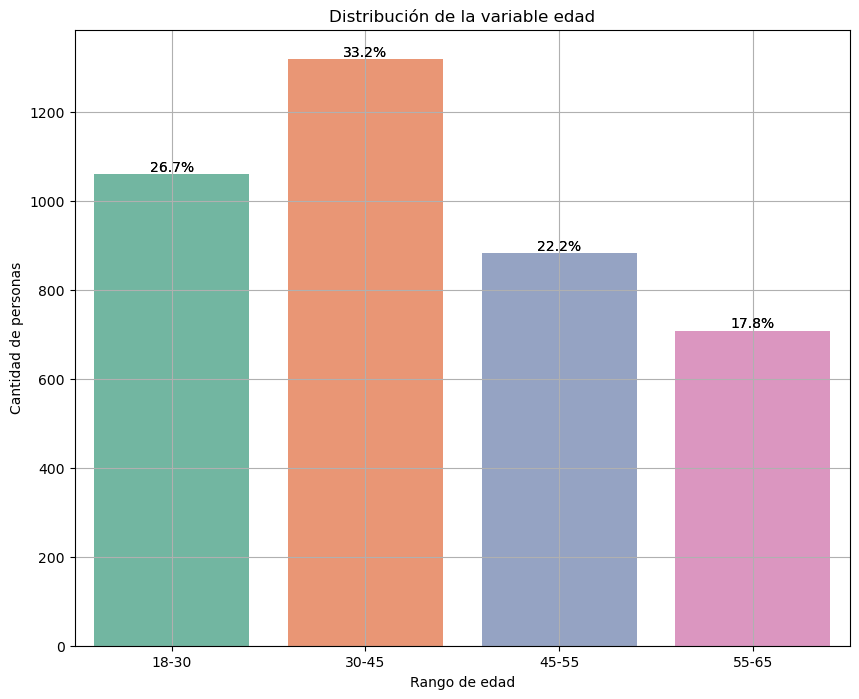

In [68]:

#Grafica de barras de age_group 
plt.figure(figsize=[10,8])
sns.countplot(data=df_ages2, x='age_group', palette='Set2')
ax = sns.countplot(data=df_ages2, x='age_group', palette='Set2')
total = len(df_ages2)
for p in ax.patches:
    porcentaje = 100 * p.get_height() / total
    ax.annotate(f'{porcentaje:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.title("Distribución de la variable edad")
plt.xlabel("Rango de edad")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.xticks()
plt.show()

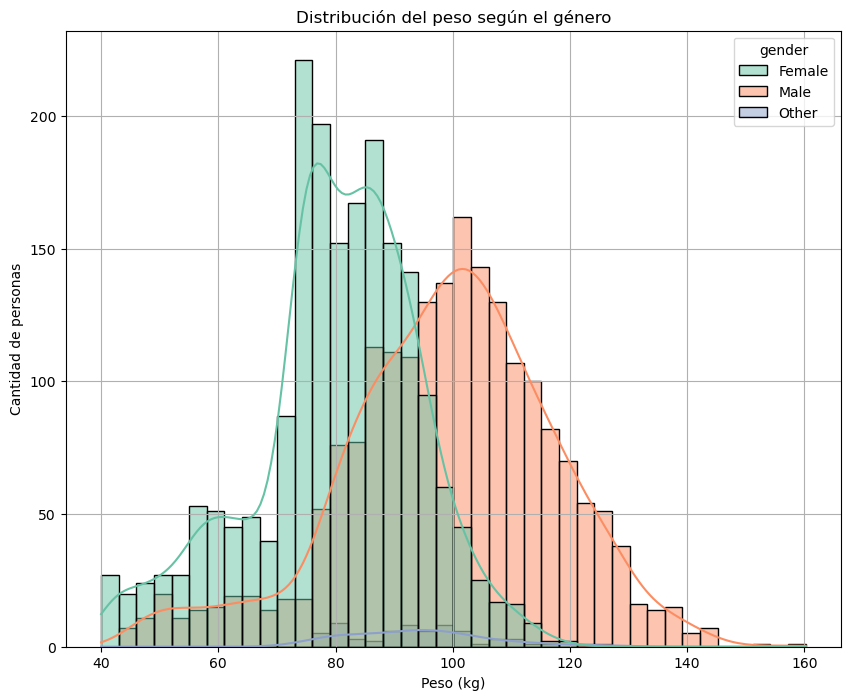

In [69]:
#histograma de peso segun genero
plt.figure(figsize=[10,8])
sns.histplot(data=df_ages2, x='weight_kg', hue='gender', kde=True, palette='Set2')
plt.title("Distribución del peso según el género")
plt.xlabel("Peso (kg)")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.show()

In [70]:
df_ages2

,participant_id,gender,age,height_mts,weight_kg,age_range,imc,duration_minutes,avg_heart_rate,calories_burned,activity_type,code_activity,code_gender,stress_level,age_group
0,1.0,Female,56.0,1.653,84.341411,55-64,30.867052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55-65
1,2.0,Male,40.0,1.776,107.003280,30-44,33.924321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-45
2,3.0,Female,23.0,1.584,94.103271,18-29,37.505449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-30
3,4.0,Female,37.0,1.672,100.236015,30-44,35.855126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-45
4,5.0,Male,50.0,1.720,115.794081,45-54,39.140779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,NaN,Male,24.0,1.740,87.100000,NaN,28.770000,94.2,158.0,14.479830,Strength,12.0,1.0,5.249722,18-30
3969,NaN,Male,25.0,1.610,66.600000,NaN,25.690000,82.8,166.0,15.217391,Strength,12.0,1.0,5.249823,18-30
3970,NaN,Female,59.0,1.760,60.400000,NaN,19.500000,103.2,120.0,9.001938,Cardio,11.0,0.0,5.253135,55-65
3971,NaN,Male,32.0,1.830,126.400000,NaN,37.740000,66.0,146.0,13.378788,HIIT,4.0,1.0,5.249610,30-45


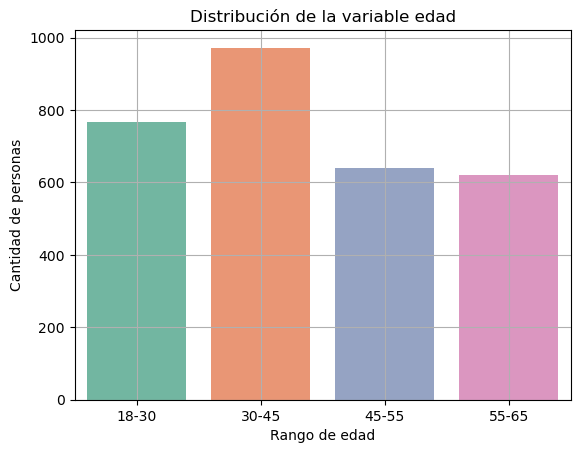

In [71]:
# Clasificar la variable age en rangos definidos
bins = [18, 30, 45, 55, 65]
labels = ['18-30', '30-45', '45-55', '55-65']
df_ages2['age_group'] = pd.cut(resumen_personas['age'], bins=bins, labels=labels, right=True, include_lowest=True)
#Grafica de barras de age_group 
sns.countplot(data=df_ages2, x='age_group', palette='Set2')
plt.title("Distribución de la variable edad")
plt.xlabel("Rango de edad")
plt.ylabel("Cantidad de personas")
plt.grid()
plt.xticks()
plt.show()

In [72]:
df_final.head(10)

,age,gender,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,activity_type,imc,code_activity,code_gender,stress_level,participant_id,age_range
0,56.0,Male,1.71,88.3,101.4,157.0,12.948718,Yoga,30.20,10,1.0,5.252718,NaN,NaN
1,46.0,Female,1.53,74.9,78.0,151.0,11.320513,HIIT,32.00,4,0.0,5.251022,NaN,NaN
2,32.0,Female,1.66,68.1,66.6,122.0,10.165165,Cardio,24.71,11,0.0,5.250414,NaN,NaN
3,25.0,Male,1.70,53.2,35.4,164.0,15.028249,Strength,18.41,12,1.0,5.249823,NaN,NaN
4,38.0,Male,1.79,46.1,38.4,158.0,14.479167,Strength,14.39,12,1.0,5.251133,NaN,NaN
5,56.0,Female,1.68,58.0,95.4,156.0,11.698113,HIIT,20.55,4,0.0,5.252030,NaN,NaN
6,36.0,Male,1.72,70.3,89.4,169.0,15.492170,Cardio,23.76,11,1.0,5.250817,NaN,NaN
7,40.0,Female,1.51,69.7,76.2,141.0,11.745407,Cardio,30.57,11,0.0,5.251220,NaN,NaN
8,28.0,Male,1.94,121.7,61.8,127.0,11.634304,Strength,32.34,12,1.0,5.250125,NaN,NaN
9,28.0,Male,1.84,101.8,64.8,136.0,12.469136,Cardio,30.07,11,1.0,5.250011,NaN,NaN


#### 3.C.4 Eliminar variables categoricas textuales (Se establecieron como categorias númericas)

In [73]:
# Eliminar id, genero y tipo de actividad
df_final = df_final.drop(columns=['gender','activity_type', 'participant_id'])

## *_3.C.5 CONJUNTO DE DATOS PARA PREDECIR LA QUEMA DE CALORÍAS QUEMADAS DE VARIAS_*

In [74]:
df_final

,age,height_mts,weight_kg,duration_minutes,avg_heart_rate,calories_burned,imc,code_activity,code_gender,stress_level,age_range
0,56.0,1.710,88.30000,101.400000,157.000000,12.948718,30.200000,10,1.0,5.252718,NaN
1,46.0,1.530,74.90000,78.000000,151.000000,11.320513,32.000000,4,0.0,5.251022,NaN
2,32.0,1.660,68.10000,66.600000,122.000000,10.165165,24.710000,11,0.0,5.250414,NaN
3,25.0,1.700,53.20000,35.400000,164.000000,15.028249,18.410000,12,1.0,5.249823,NaN
4,38.0,1.790,46.10000,38.400000,158.000000,14.479167,14.390000,12,1.0,5.251133,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30933,38.0,1.657,85.39662,65.812500,133.062500,12.793750,31.102526,6,0.0,5.250000,30-44
30934,38.0,1.657,85.39662,69.647059,132.823529,14.994118,31.102526,7,0.0,4.705882,30-44
30935,38.0,1.657,85.39662,67.555556,130.611111,7.783333,31.102526,8,0.0,3.722222,30-44
30936,38.0,1.657,85.39662,55.642857,133.714286,9.700000,31.102526,9,0.0,6.285714,30-44


In [75]:
df_final.to_csv("actividad_fisica_data.csv", sep=",", encoding='utf-8')

### 4. Análisis estadístico de los datos (EDA) Para el conjunto general de los datos
#### 4.1. Análisis de la correlación del conjunto de datos

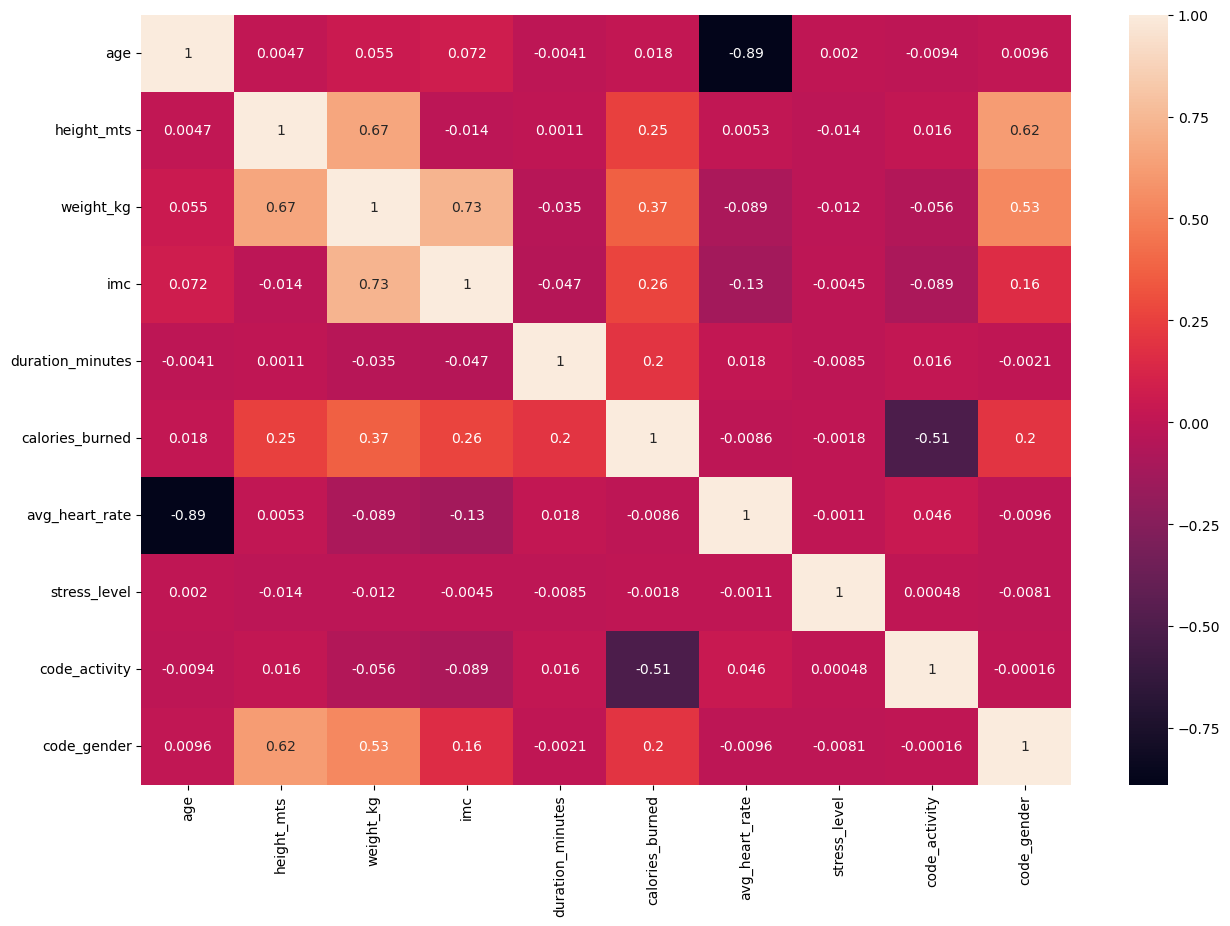

In [76]:
# Método corr para obtener la correlación de datos
correlacion = df_final[['age', 'height_mts', 'weight_kg','imc',
        'duration_minutes', 'calories_burned','avg_heart_rate',
        'stress_level', 'code_activity', 'code_gender']].corr()
plt.figure(figsize=[15,10])
sns.heatmap(correlacion, annot=True)
plt.show()

### 4.2. Diagramas de boxplot

#### Mostrar categorías la quema de calorías por actividad, clasificado por deporte

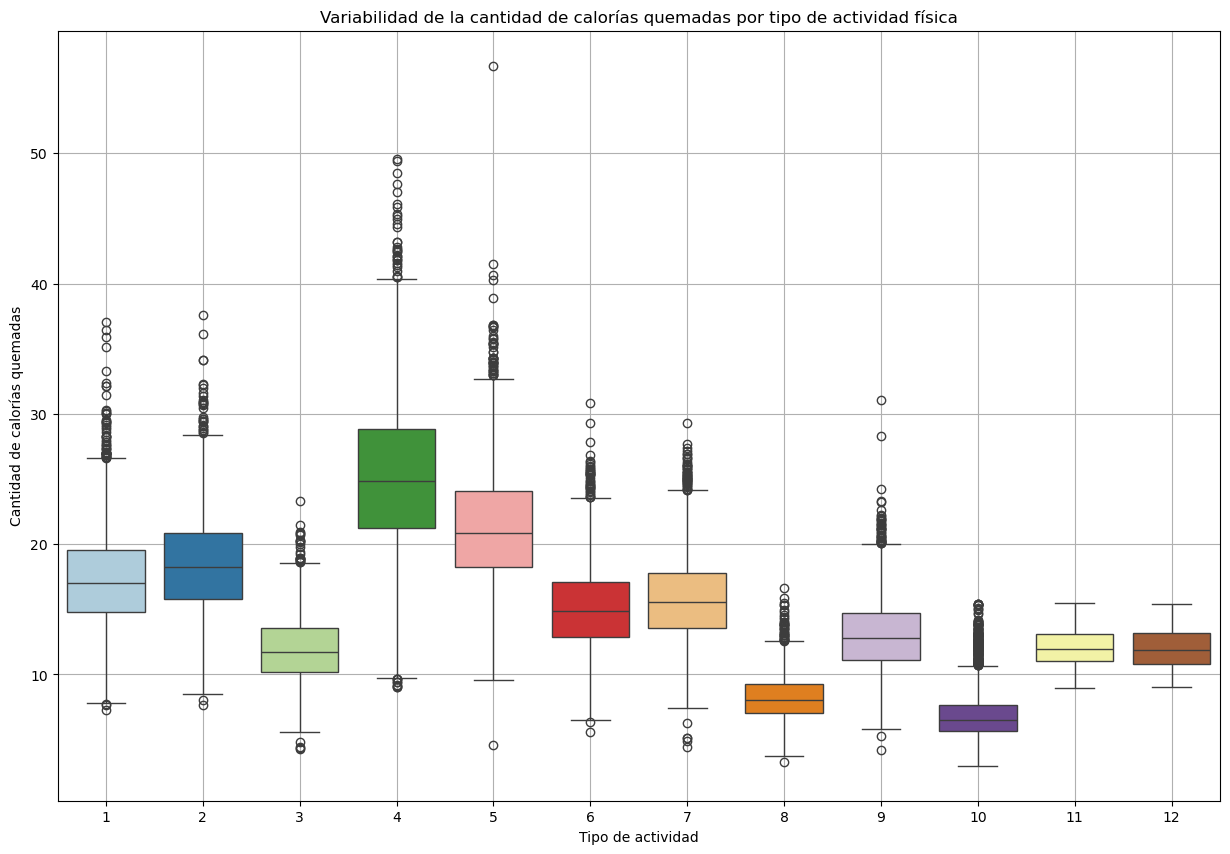

In [77]:
plt.figure(figsize=[15,10])
sns.boxplot(x='code_activity', y='calories_burned', data=df_final,
           palette= sns.color_palette("Paired"))
plt.title("Variabilidad de la cantidad de calorías quemadas por tipo de actividad física")
plt.xlabel("Tipo de actividad")
plt.ylabel("Cantidad de calorías quemadas")
plt.grid()
plt.xticks()
plt.show()

### 4.3. Gráficas de dispersión para ver el comportamiento de las características con base en la quema de calorías
#### Altura en metros vs quema de calorías

<Axes: xlabel='height_mts', ylabel='calories_burned'>

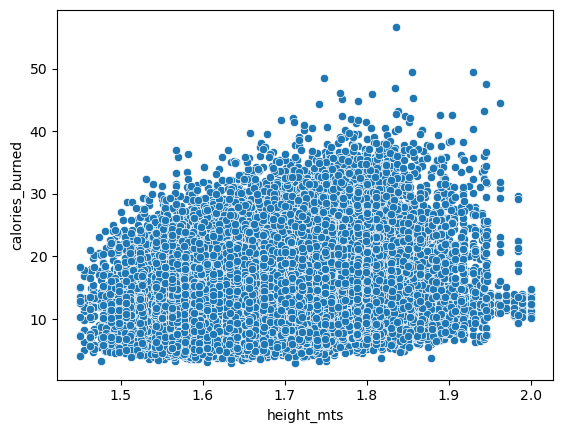

In [78]:
sns.scatterplot(x='height_mts', y= 'calories_burned', data=df_final)

#### Peso en kg vs quema de calorías

<Axes: xlabel='weight_kg', ylabel='calories_burned'>

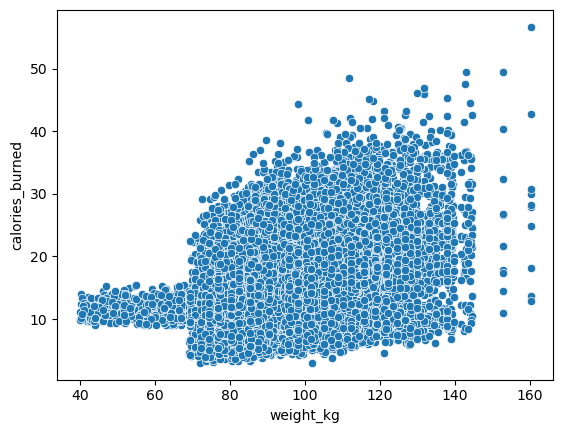

In [79]:
sns.scatterplot(x='weight_kg', y= 'calories_burned', data=df_final)

#### Duración minutos vs quema de calorías

<Axes: xlabel='duration_minutes', ylabel='calories_burned'>

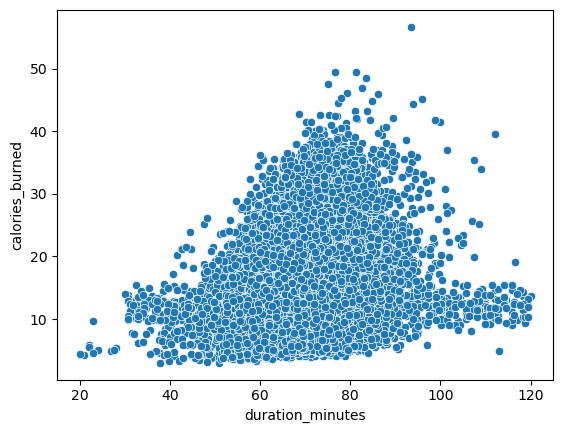

In [80]:
sns.scatterplot(x='duration_minutes', y= 'calories_burned', data=df_final)

#### Nivel de estres vs quema de calorías

<Axes: xlabel='stress_level', ylabel='calories_burned'>

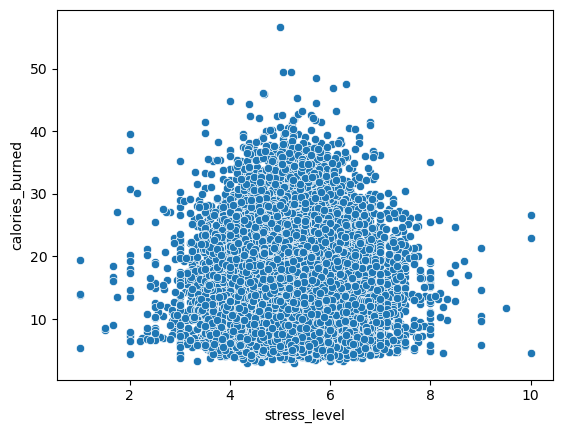

In [81]:
sns.scatterplot(x='stress_level', y= 'calories_burned', data=df_final)

### 5. Modelamiento (Generar modelos para predecir la quema de calorías)

In [82]:
# Leer columnas
df_modelo = df_final # Agregar dataset completo a una variable para tratamiento de modelos
print(df_modelo.columns)

Index(['age', 'height_mts', 'weight_kg', 'duration_minutes', 'avg_heart_rate',
       'calories_burned', 'imc', 'code_activity', 'code_gender',
       'stress_level', 'age_range'],
      dtype='object')


### 5.1. Particionar dataset en conjuntos de datos de entrenamiento y prueba

In [83]:
# Todos los modelos se trataran en igualdad de parametros para manejar las pruebas de forma adecuada y balanceada
X = df_modelo[['age', 'height_mts', 'weight_kg', 'duration_minutes', 'avg_heart_rate',
               'imc', 'code_activity', 'code_gender','stress_level']]
y = df_modelo[['calories_burned']]
# Generar particiones de entrenamiento y prueba
# Entrenamiento (80% de los datos)
# Prueba (20% de los datos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 5.2. Prueba de modelos utilizando metricas de regresion

#### 5.2.1. Caso sin escalamiento (Datos tratados solamente)
#### _Regresión lineal multiple_

In [84]:
# Generar y entrenar (Ajustar) el modelo de regresión líneal por medio de los datos particionados
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [85]:
prediccion = modelo.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

# Metricas
print("------------METRICAS DE REGRESIÓN LÍNEAL-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
linear_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
linear_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
linear_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
linear_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
linear_R2 = metrics_regressor.r2_score(y_test, prediccion)

Calorías quemadas de la persona en el conjunto de datos [[11.88717871]
 [21.44724635]
 [16.23037239]
 ...
 [10.26366979]
 [16.83932082]
 [18.04829736]]
------------METRICAS DE REGRESIÓN LÍNEAL-------------------
MSA Score:  3.8580220940921484
MSE Score:  23.322646458440957
RWSE Score:  4.829352592060447
MAPE Score:  0.29343782840703664
Puntaje de la regresion (R2):  0.43216566968315784


#### _Árbol de decisiones_

In [86]:
# Generar y entrenar (Ajustar) el modelo de árbol de decisión por medio de los datos particionados
modelo = DecisionTreeRegressor(max_depth=200, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=200, random_state=42)

In [87]:
# Predicción y metricas
prediccion = modelo.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)
print("------------METRICAS DE REGRESIÓN POR ÁRBOLES DE DECISIÓN-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2) (Cerca a 1 muestra que es una excelente predicción)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
destree_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
destree_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
destree_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
destree_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
destree_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.20512821 21.17894737 12.2625     ... 11.0625     11.55
 11.31      ]
------------METRICAS DE REGRESIÓN POR ÁRBOLES DE DECISIÓN-------------------
MSA Score:  1.7164822384693785
MSE Score:  5.991775601894047
RWSE Score:  2.4478103688590847
MAPE Score:  0.11501498157892322
Puntaje de la regresion (R2):  0.8541187899763869


#### _Random Forest_

In [88]:
# Crear el modelo de Random Forest definido con 500 árboles
modelo = RandomForestRegressor(n_estimators=500,max_depth=200, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=200, n_estimators=500, random_state=42)

In [89]:
prediccion = modelo.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

print("------------METRICAS DE RANDOM FOREST-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
randomf_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
randomf_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
randomf_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
randomf_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
randomf_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.07527352 18.49876198 13.81765243 ... 10.69305593 12.87024442
 12.13994462]
------------METRICAS DE RANDOM FOREST-------------------
MSA Score:  1.253476508946464
MSE Score:  3.114399437615437
RWSE Score:  1.7647661141396151
MAPE Score:  0.08548965113594334
Puntaje de la regresion (R2):  0.924174003059697


#### _Redes neuronales (Regresión por perceptrón multicapa)_

In [90]:
modelo = MLPRegressor(max_iter=500, hidden_layer_sizes=500, random_state=42)
modelo.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=500, max_iter=500, random_state=42)

In [91]:
# Predicción y metricas
prediccion = modelo.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)
print("------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2) (Cerca a 1 muestra que es una excelente predicción)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
MLP_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
MLP_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
MLP_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
MLP_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
MLP_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [11.74081548 19.76474987 12.17631469 ...  9.48443955 14.05779126
 13.86389225]
------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------
MSA Score:  2.2360806627135466
MSE Score:  7.349200934961981
RWSE Score:  2.710940968549847
MAPE Score:  0.18098933967678202
Puntaje de la regresion (R2):  0.8210696801195259


#### *_Gráfico de barras de error cuadratico medio de los modelos (Sin escalar)_*

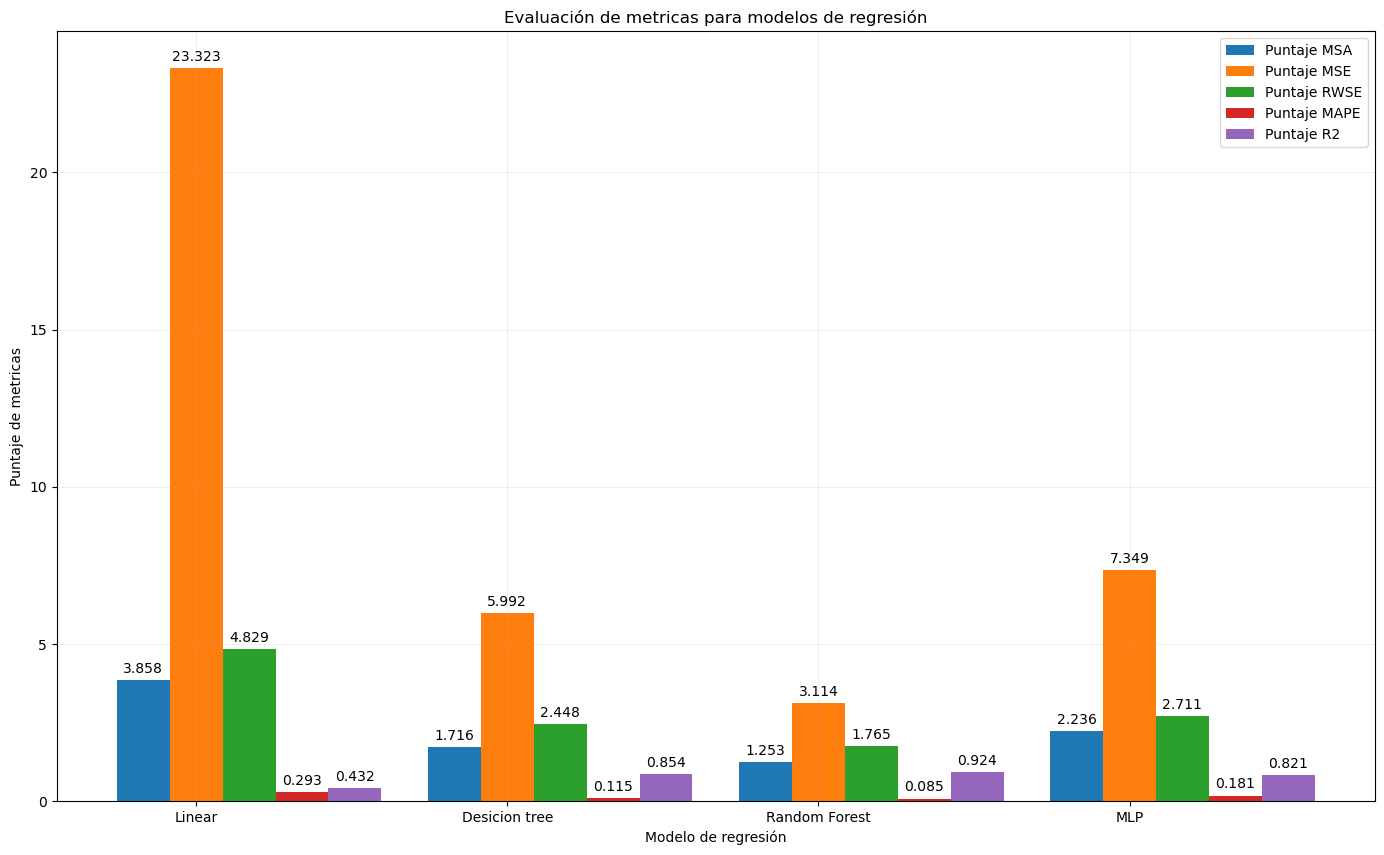

In [92]:
etiquetas = ["Linear", "Desicion tree", "Random Forest", "MLP"]

metricas = {
    'Puntaje MSA': list(np.around([linear_MSA, destree_MSA, randomf_MSA, MLP_MSA], 3)),
    'Puntaje MSE': list(np.around([linear_MSE, destree_MSE, randomf_MSE, MLP_MSE], 3)),
    'Puntaje RWSE': list(np.around([linear_RWSE, destree_RWSE, randomf_RWSE, MLP_RWSE], 3)),
    'Puntaje MAPE': list(np.around([linear_MAPE, destree_MAPE, randomf_MAPE, MLP_MAPE], 3)),
    'Puntaje R2': list(np.around([linear_R2, destree_R2, randomf_R2, MLP_R2], 3))
}

x = np.arange(len(etiquetas))
width = 0.17
multiplier = 0

fig, ax = plt.subplots(figsize=[17,10])

for attribute, measurement in metricas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title("Evaluación de metricas para modelos de regresión")
ax.set_xlabel("Modelo de regresión")
ax.set_ylabel("Puntaje de metricas")
ax.set_xticks(x + width, etiquetas)
ax.legend(ncols=1)
plt.grid(linestyle='-', alpha=0.2)
plt.show()

#### 5.2.2. Caso con escalamiento normal (StandardScaler())

In [93]:
standard = StandardScaler() # Clase que permite normalizar/ escalar los datos del conjunto
# Computar media y desviación estandar para escalamiento
# Normalizar el conjunto de datos (Media = 0, desviación estandar = 1) <StandardScaler>

robust = RobustScaler() # Clase para normalizar los datos por media y IQR
# Computar mediana y rango intercuartilico <RobustScaler> para escalamiento

# Escalar solamente los parametros de entrada a valores normales
standard.fit(X_train)
X_train_scaler =  standard.fit_transform(X_train)
X_test_scaler =  standard.fit_transform(X_test)

#### _Regresión lineal multiple_

In [94]:
modelo = LinearRegression()
modelo.fit(X_train_scaler, y_train)

LinearRegression()

In [95]:
prediccion = modelo.predict(X_test_scaler)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

# Metricas
print("------------METRICAS DE REGRESIÓN LÍNEAL-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
linear_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
linear_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
linear_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
linear_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
linear_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [[11.95895736]
 [21.55624001]
 [16.25042771]
 ...
 [10.29485435]
 [16.84589641]
 [18.10475619]]
------------METRICAS DE REGRESIÓN LÍNEAL-------------------
MSA Score:  3.8600591420162633
MSE Score:  23.32442242551854
RWSE Score:  4.829536460729802
MAPE Score:  0.29477953178969546
Puntaje de la regresion (R2):  0.43212243037590503


#### _Árbol de decisiones_

In [96]:
# Generar y entrenar (Ajustar) el modelo de árbol de decisión por medio de los datos particionados
modelo = DecisionTreeRegressor(max_depth=200, random_state=42)
modelo.fit(X_train_scaler, y_train)

DecisionTreeRegressor(max_depth=200, random_state=42)

In [97]:
# Predicción y metricas
prediccion = modelo.predict(X_test_scaler)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)
print("------------METRICAS DE REGRESIÓN POR ÁRBOLES DE DECISIÓN-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2) (Cerca a 1 muestra que es una excelente predicción)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
destree_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
destree_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
destree_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
destree_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
destree_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.20512821 21.17894737 12.2625     ... 10.86944444 11.55
 11.31      ]
------------METRICAS DE REGRESIÓN POR ÁRBOLES DE DECISIÓN-------------------
MSA Score:  1.7187413697498706
MSE Score:  5.883306490160497
RWSE Score:  2.4255528215564586
MAPE Score:  0.11565626425423113
Puntaje de la regresion (R2):  0.856759677473054


#### _Random Forest_

In [98]:
# Crear el modelo de Random Forest
modelo = RandomForestRegressor(n_estimators=500,max_depth=200, random_state=42)
modelo.fit(X_train_scaler, y_train)

RandomForestRegressor(max_depth=200, n_estimators=500, random_state=42)

In [99]:
prediccion = modelo.predict(X_test_scaler)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

print("------------METRICAS DE RANDOM FOREST-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
randomf_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
randomf_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
randomf_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
randomf_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
randomf_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.14154368 18.81729586 13.54971466 ... 10.61575331 12.89617402
 12.15305924]
------------METRICAS DE RANDOM FOREST-------------------
MSA Score:  1.2626229959965227
MSE Score:  3.142729123440044
RWSE Score:  1.7727744141429964
MAPE Score:  0.08624665690003795
Puntaje de la regresion (R2):  0.9234842628020051


#### _Redes neuronales (Regresión por perceptrón multicapa)_

In [100]:
# Generar un perceptron multicapa: 200 iteración (Por defecto)
modelo = MLPRegressor(max_iter=500, hidden_layer_sizes=500, random_state=42)
modelo.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=500, max_iter=500, random_state=42)

In [101]:
# Predicción y metricas
prediccion = modelo.predict(X_test_scaler)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)
print("------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2) (Cerca a 1 muestra que es una excelente predicción)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
MLP_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
MLP_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
MLP_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
MLP_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
MLP_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.86557043 18.83694309 15.09775979 ... 12.4249042  12.00405451
 11.93367467]
------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------
MSA Score:  1.3390113057259698
MSE Score:  3.270179494183508
RWSE Score:  1.8083637615766104
MAPE Score:  0.09515323759718959
Puntaje de la regresion (R2):  0.9203812403363211


#### *_Gráfico de barras de los modelos (Por error cuadratico medio)_*

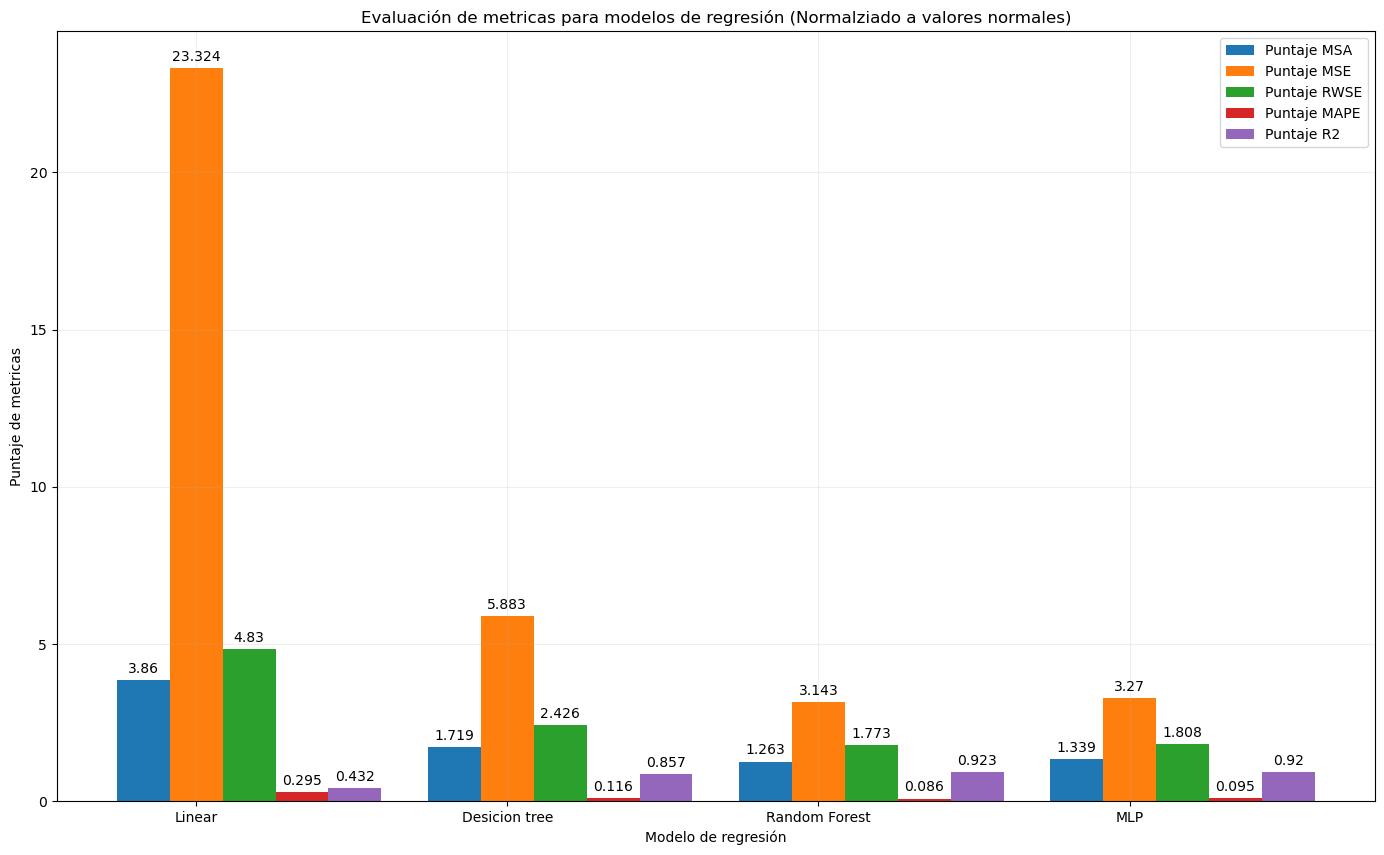

In [102]:
etiquetas = ["Linear", "Desicion tree", "Random Forest", "MLP"]

metricas = {
    'Puntaje MSA': list(np.around([linear_MSA, destree_MSA, randomf_MSA, MLP_MSA], 3)),
    'Puntaje MSE': list(np.around([linear_MSE, destree_MSE, randomf_MSE, MLP_MSE], 3)),
    'Puntaje RWSE': list(np.around([linear_RWSE, destree_RWSE, randomf_RWSE, MLP_RWSE], 3)),
    'Puntaje MAPE': list(np.around([linear_MAPE, destree_MAPE, randomf_MAPE, MLP_MAPE], 3)),
    'Puntaje R2': list(np.around([linear_R2, destree_R2, randomf_R2, MLP_R2], 3))
}

x = np.arange(len(etiquetas))
width = 0.17
multiplier = 0

fig, ax = plt.subplots(figsize=[17,10])

for attribute, measurement in metricas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title("Evaluación de metricas para modelos de regresión (Normalziado a valores normales)")
ax.set_xlabel("Modelo de regresión")
ax.set_ylabel("Puntaje de metricas")
ax.set_xticks(x + width, etiquetas)
ax.legend(ncols=1)
plt.grid(linestyle='-', alpha=0.2)
plt.show()

### 5.3. Optimización de hiperparametros del modelo de regresión (RandomForest vs Perceptrón multicapa)

#### _*Random Forest*_

In [103]:
# Tratar distribuciones de hiperparametros para Random Forest
param_distributions = {
    'n_estimators': np.arange(1, 200, 2),
    'max_depth': [None] + list(np.arange(1, 200, 2))
}
# Crear el modelo de Random Forest  (Se manejan los conjuntos de datos de entrenamiento y prueba anteriores)
modelo = RandomForestRegressor()

# Generar modelo de optimización de hiperparametros (Asignar modelo, espacio como diccionario y estado de aleatoriedad de las pruebas anteriores)
optimizar = RandomizedSearchCV(modelo,param_distributions, n_iter=3, cv=5, random_state=42)
buscar_hyper = optimizar.fit(X_train, y_train)
print("Mejores hiperparametros para random forest", buscar_hyper.best_params_)
print("Mejor puntaje", buscar_hyper.best_score_)

Mejores hiperparametros para random forest {'n_estimators': np.int64(121), 'max_depth': np.int64(15)}
Mejor puntaje 0.917790831312739


#### _*Red neuronal: Perceptrón multicapa (Escalamiento estandar/normal)*_

In [104]:
# Tratar distribuciones  de hiperparametros para perceptron multicapa
param_distributions = {
    'hidden_layer_sizes': np.arange(1, 200, 2),
    'max_iter': np.arange(0, 200, 2),
}

# Crear el modelo de Random Forest  (Se manejan los conjuntos de datos de entrenamiento y prueba anteriores)
modelo = MLPRegressor()

# Generar modelo de optimización de hiperparametros (Asignar modelo, espacio como diccionario y estado de aleatoriedad de las pruebas anteriores)
optimizar = RandomizedSearchCV(modelo,param_distributions, n_iter=3, cv=5, random_state=42)
buscar_hyper = optimizar.fit(X_train_scaler, y_train)
print("Mejores hiperparametros para perceptron multicapa RNA", buscar_hyper.best_params_)
print("Mejor puntaje", buscar_hyper.best_score_)

Mejores hiperparametros para perceptron multicapa RNA {'max_iter': np.int64(180), 'hidden_layer_sizes': np.int64(107)}
Mejor puntaje 0.8227665673895734


### 5.4. Probar modelos optimizados
#### _*Random Forest*_

In [105]:
# Crear el modelo de Random Forest con hiperparametros optimizados
# Mejores hiperparametros para random forest {'n_estimators': np.int64(89), 'max_depth': np.int64(49)}
modelo = RandomForestRegressor(n_estimators=89,max_depth=49, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=49, n_estimators=89, random_state=42)

In [106]:
prediccion = modelo.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

print("------------METRICAS DE RANDOM FOREST (OPTIMIZAOD)-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
randomf_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
randomf_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
randomf_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
randomf_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
randomf_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [ 8.14437491 18.51483456 13.84793265 ... 10.5179448  12.94384751
 12.22701859]
------------METRICAS DE RANDOM FOREST (OPTIMIZAOD)-------------------
MSA Score:  1.2570684684022355
MSE Score:  3.134224792026593
RWSE Score:  1.7703741954814505
MAPE Score:  0.08566901343094376
Puntaje de la regresion (R2):  0.923691316977506


#### _*Red neuronal: Perceptrón multicapa (Escalamiento estandar/normal)*_

In [107]:
# Generar un perceptron multicapa con hiperparametros optimizados
# Mejores hiperparametros para perceptron multicapa RNA {'max_iter': np.int64(180), 'hidden_layer_sizes': np.int64(107)
modelo = MLPRegressor(max_iter=180, hidden_layer_sizes=107, random_state=42)
modelo.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=107, max_iter=180, random_state=42)

In [108]:
# Predicción y metricas
prediccion = modelo.predict(X_test_scaler)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)
print("------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RWSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2) (Cerca a 1 muestra que es una excelente predicción)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))
MLP_MSA = metrics_regressor.mean_absolute_error(y_test, prediccion) # Asignar MSA
MLP_MSE = metrics_regressor.mean_squared_error(y_test, prediccion) # Asignar MSE
MLP_RWSE = metrics_regressor.root_mean_squared_error(y_test, prediccion) # Asignar RWSE
MLP_MAPE = metrics_regressor.mean_absolute_percentage_error(y_test, prediccion) # Asignar MAPE
MLP_R2 = metrics_regressor.r2_score(y_test, prediccion) #Asignar R2

Calorías quemadas de la persona en el conjunto de datos [10.97645716 19.63806078 12.31690571 ... 10.1935975  14.70707066
 13.72061937]
------------METRICAS DE RNA Perceptrón multicapa regresivo-------------------
MSA Score:  2.1809282489387227
MSE Score:  6.983144713784849
RWSE Score:  2.6425640415673657
MAPE Score:  0.17832945577102088
Puntaje de la regresion (R2):  0.8299820173013641


#### *_Gráficos de metricas para modelos optimizados_*

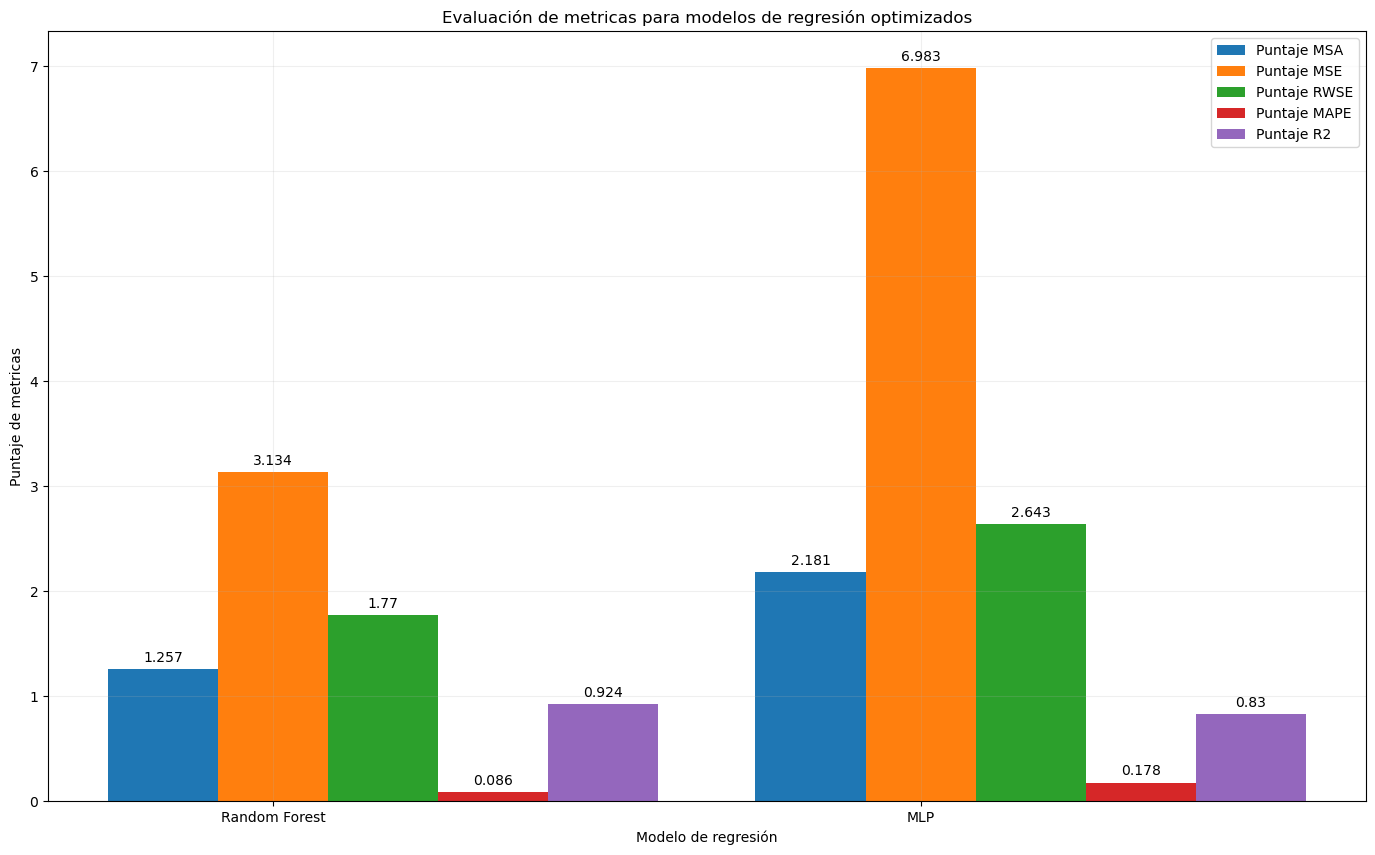

In [109]:
etiquetas = ["Random Forest", "MLP"]

metricas = {
    'Puntaje MSA': list(np.around([randomf_MSA, MLP_MSA], 3)),
    'Puntaje MSE': list(np.around([randomf_MSE, MLP_MSE], 3)),
    'Puntaje RWSE': list(np.around([randomf_RWSE, MLP_RWSE], 3)),
    'Puntaje MAPE': list(np.around([randomf_MAPE, MLP_MAPE], 3)),
    'Puntaje R2': list(np.around([randomf_R2, MLP_R2], 3))
}

x = np.arange(len(etiquetas))
width = 0.17
multiplier = 0

fig, ax = plt.subplots(figsize=[17,10])

for attribute, measurement in metricas.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title("Evaluación de metricas para modelos de regresión optimizados")
ax.set_xlabel("Modelo de regresión")
ax.set_ylabel("Puntaje de metricas")
ax.set_xticks(x + width, etiquetas)
ax.legend(ncols=1)
plt.grid(linestyle='-', alpha=0.2)
plt.show()

### 5.5. Despligue del modelo
#### 5.5.1. Generar pipeline para tratar los escalamientos, modelos y metricas para modelo seleccionado

In [110]:
# Modelo seleccionado con optimización (Random Forest)
pipeline_RF = Pipeline(steps=[('RF', RandomForestRegressor(n_estimators=89,max_depth=49, random_state=42))],
                               memory=None)
# Entrenar el pipeline
pipeline_RF.fit(X_train, y_train)


Pipeline(steps=[('RF',
                 RandomForestRegressor(max_depth=49, n_estimators=89,
                                       random_state=42))])

In [111]:
# Predecir resultado
prediccion = pipeline_RF.predict(X_test)
print("Calorías quemadas de la persona en el conjunto de datos", prediccion)

print("------------METRICAS DE RANDOM FOREST (PIPELINE)-------------------")
 # Metricas a valorar en los modelos de regresión (En General)
# Mean absolute error (MSA) (Cerca de 0.0 es el mejor valor)
print("MSA Score: ", metrics_regressor.mean_absolute_error(y_test, prediccion))
# Mean Squared Error (MSE) (Cerca de 0.0 es el mejor valor)
print("MSE Score: ", metrics_regressor.mean_squared_error(y_test, prediccion))
# Root Mean Squared Error (RMSE) (Cerca de 0.0 es el mejor valor)
print("RWSE Score: ", metrics_regressor.root_mean_squared_error(y_test, prediccion))
# Mean Absolute Percentage Error (MAPE) (Cerca de 0.0 es el mejor valor)
print("MAPE Score: ", metrics_regressor.mean_absolute_percentage_error(y_test, prediccion))
# Coeficiente de regresion (R2)
print("Puntaje de la regresion (R2): ",
      metrics_regressor.r2_score(y_test, prediccion))

Calorías quemadas de la persona en el conjunto de datos [ 8.14437491 18.51483456 13.84793265 ... 10.5179448  12.94384751
 12.22701859]
------------METRICAS DE RANDOM FOREST (PIPELINE)-------------------
MSA Score:  1.2570684684022355
MSE Score:  3.134224792026593
RWSE Score:  1.7703741954814505
MAPE Score:  0.08566901343094376
Puntaje de la regresion (R2):  0.923691316977506


In [112]:
# HACER PRUEBA CON DATOS REALES
# Ejemplo de nuevo dato para predecir
nuevo_dato = {

    "age": [25],
    "height_mts": [1.79],
    "weight_kg": [70],
    "duration_minutes": [60],
    "avg_heart_rate": [145],      # si tu modelo lo necesita
    "imc": [22],
    "age": [29],               # si tu modelo lo necesita
    "code_activity": [1],
    "code_gender": [1],  # 1=Male, 0=Female (según tu codificación)
    "stress_level": [5]
}

df_nuevo = pd.DataFrame(nuevo_dato)
print(df_nuevo)
calorias_pred = pipeline_RF.predict(df_nuevo)

# Predicción de prueba real
print("Predicción de calorías quemadas:", calorias_pred[0])
print("Predicción de calorías quemadas por semana:", calorias_pred[0] * 7)

   age  height_mts  weight_kg  duration_minutes  avg_heart_rate  imc  \
0   29        1.79         70                60             145   22   

   code_activity  code_gender  stress_level  
0              1            1             5  
Predicción de calorías quemadas: 12.417276569916014
Predicción de calorías quemadas por semana: 86.9209359894121


#### 5.5.2. Generar archivo de modelo

In [113]:
# Persistir en disco el archivo del modelo
joblib.dump(pipeline_RF, "modelo_act_fisica.pkl")

['modelo_act_fisica.pkl']

# ¡FIN DEL PROYECTO!